In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import logging
import datetime
import warnings
from lmfit.models import PseudoVoigtModel, GaussianModel
from jupyterthemes import jtplot

In [5]:
from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *
from xps.xps_fits import *

jtplot.style('default', grid=False)
logging.getLogger().setLevel(logging.CRITICAL)
warnings.filterwarnings("ignore")

plt.rcParams['errorbar.capsize'] = 8
plt.rcParams['font.size'] = 18
plt.rc('font', size= 18)
plt.rc('legend', fontsize= 15)
plt.rc('xtick', labelsize= 18)
plt.rc('ytick', labelsize= 18)
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)
plt.rcParams["xtick.major.size"] = 8
plt.rcParams["xtick.major.size"] = 8
plt.rcParams['axes.edgecolor'] = '0.'
plt.rcParams['axes.labelcolor'] = '0.'
plt.rcParams['xtick.color'] = '0.'
plt.rcParams['ytick.color'] = '0.'
plt.rcParams['text.color'] = '0.'
plt.rcParams['axes.linewidth'] = 1.6
plt.rcParams['lines.linewidth'] = 4

plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)
plt.rcParams["xtick.major.size"] = 10
plt.rcParams["ytick.major.size"] = 10
plt.rcParams["xtick.minor.size"] = 6
plt.rcParams["ytick.minor.size"] = 6
plt.rcParams["xtick.major.width"] = 2

plt.rcParams["xtick.minor.width"] = 1
plt.rcParams["ytick.minor.width"] = 1
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams["xtick.minor.visible"] = True

In [6]:
asf = dict({'C_1s' : 0.296, 'O_1s' : 0.711, 'N_1s' : 0.477, 'Ba_3d' : 7.49, 'Ba_3d_5/2' : 7.49, 'Ba_3d_3/2' : 5.20,
            'Br_3p' : 1.054, 'Cu_2p' : 5.321, 'Ba_4d': 2.35, 'Na_1s' : 1.685, 'Cl_2s' : 0.37,
           'In3d' : 4.359, 'Sn3d' : 4.725, 'Cl_2p' : 0.891, 'Si2p': 0.339})
asf2 = {'Ba_3d_5/2' : 25.8, 'Ba_3d_3/2': 17.9, 'Ba_4d': 5.86, 'Cl_2p': 2.28, 'Cl_2s': 1.69}

asf3 = {'Ba_3d_5/2' : 64.3, 'Ba_3d_3/2': 49.9, 'Ba_4d': 5.86, 'Cl_2p': 2.28, 'Cl_2s': 1.50}

In [7]:
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.grid.which'] = 'major'
plt.rcParams['axes.grid.axis'] = 'x'

## Supplementary Information figures

# BaCl$_2$ evaporation in Cu and Au

[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaCl2/proc/Cu_BaCl220201026_Cu_BaCl2_subl_45min.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/Au111_FBI/2021_05_25_Au111/proc/20210525_Au111_BaCl2_subl_320s.sxy.ft', returning empty fit dict


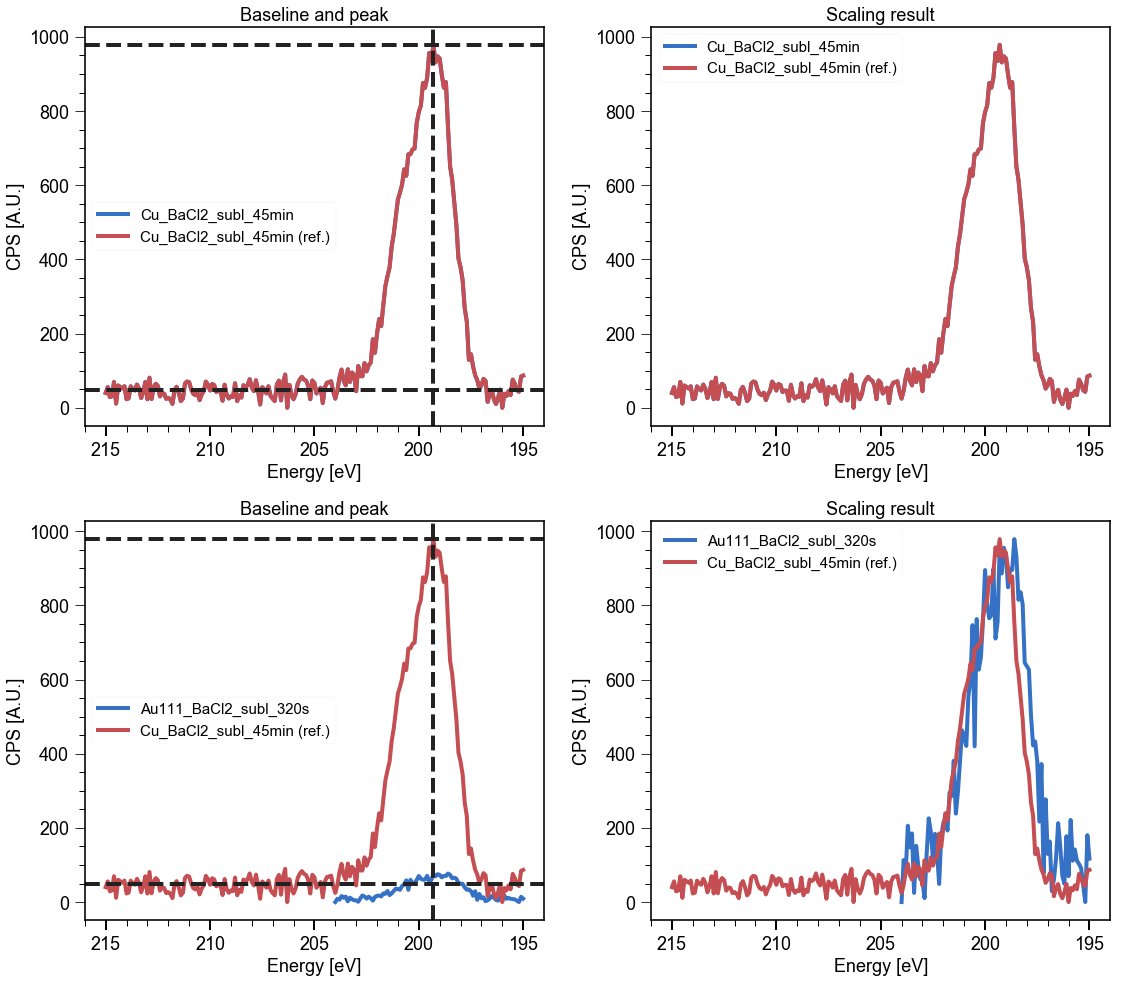

In [64]:
pathbacu = '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaCl2/proc/Cu_BaCl220201026_Cu_BaCl2_subl_45min.sxy'
baclcu = read_processed_xp(pathbacu)
baclcu.color = 'k'

pathbaau = '/Users/pabloherrero/sabat/xps_spectra/Au111_FBI/2021_05_25_Au111/proc/20210525_Au111_BaCl2_subl_320s.sxy'
baclau = read_processed_xp(pathbaau)
baclau.color = 'r'
[baclcu, baclau] = scale_and_plot_spectra([baclcu, baclau], indRef=0, region='Cl_2p')

[27215.73168345447, 21182.965435944272]

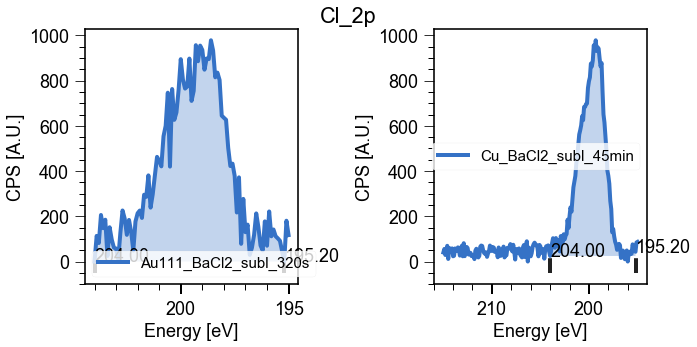

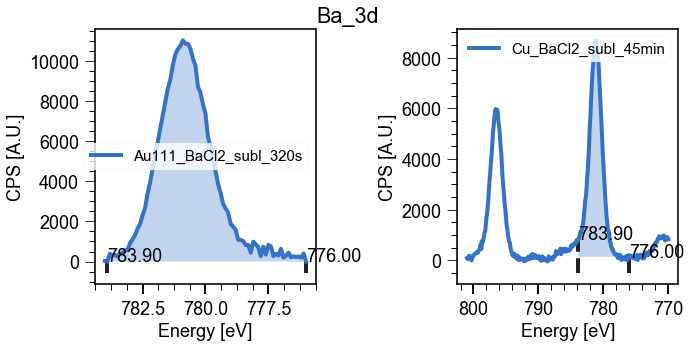

In [14]:
integrateRegions([baclau, baclcu], 'Cl_2p', asf=asf)
integrateRegions([baclau, baclcu], 'Ba_3d', asf=asf)

Text(0.5, 16.4, 'Binding Energy [eV]')

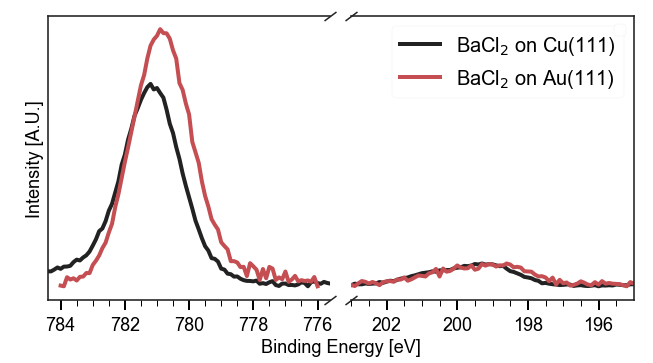

In [65]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 6))
ax2 = fig.add_subplot(111, frameon=False)
ax2.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plot_region(baclcu, 'Cl_2p', ax=ax[1], lb='BaCl$_2$ on Cu(111)')
plot_region(baclcu, 'Ba_3d', ax=ax[0])
plot_region(baclau, 'Cl_2p', ax=ax[1], lb='BaCl$_2$ on Au(111)')
plot_region(baclau, 'Ba_3d', ax=ax[0])

ax[0].set(yticks=[], xlim=(784.4, 775.6))
ax[1].set(yticks=[], xlim=(203,195), xlabel=None, ylabel=None, ylim=ax[0].get_ylim())
ax[1].legend(fontsize=20)

for a in ax:
    for sp in a.spines:
        a.spines[sp].set_color('k')
ax[0].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
plt.tight_layout(w_pad=0.05, )

d = .75  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, 
              linestyle="none", color='k', mec='k', mew=1.5, clip_on=False)
ax[0].plot([1, 1], [1, 0], transform=ax[0].transAxes, **kwargs)
ax[1].plot([0, 0], [0, 1], transform=ax[1].transAxes, **kwargs)
ax[0].set_ylabel('Intensity [A.U.]')
ax2.set_ylabel('')
ax2.set_xlabel('Binding Energy [eV]')

# plt.savefig('/Users/pabloherrero/Dropbox/phd/drafts/fbi_cu_sublimation/v4_au/si_figures/si_bacl_au_cu.png',
#             dpi=2000)

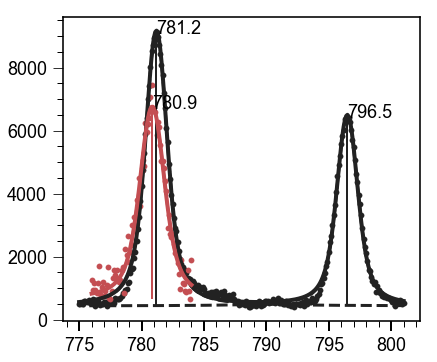

In [50]:
r = 'Ba_3d'
xpc = crop_spectrum(baclcu, r, edw=775)
Fn = XPFit(xpc, r)
Fn.double_voigt()
Fn.plot()
# xpc = crop_spectrum(baclcu, r, edw=775)
Fn = XPFit(baclau, r)
Fn.voigt()

Fn.plot()

In [51]:
sep3d = xpc.fit[r].best_values['v1_center'] - xpc.fit[r].best_values['v2_center']
baclau.fit[r].best_values['v1_center'] - sep3d

796.1618350137229

In [62]:
ax[0].spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x1a222478d0>),
             ('right', <matplotlib.spines.Spine at 0x1a19824e10>),
             ('bottom', <matplotlib.spines.Spine at 0x1a19824a58>),
             ('top', <matplotlib.spines.Spine at 0x1a19824208>)])

In [332]:
ax[0].get_xlim()

(775.6, 784.4)

## Compare position of Ba 3d with FBI

### Cu (111)

In [100]:
path = '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_04_21*/**/*.uxy'

files = glob.glob(path, recursive=True)
files.sort()
files

cubaproc = [read_processed_xp(f) for f in files]
cubaproc[0].color = 'g'
cubaproc[3].color = 'b'
# cubaproc = [normalise_dfx(xp) for xp in [cubaproc[0], cubaproc[3]]]

[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_04_21_Cu/proc/20210421_16-Cu_FBI_subl_22min_BaCl2_6min_200grad.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_04_21_Cu/proc/20210421_16-Cu_FBI_subl_22min_BaCl2_6min_300grad.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_04_21_Cu/proc/20210421_16-Cu_clean.uxy.ft', returning empty fit dict


In [99]:
path = '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02_03*/**/*.uxy'

files = glob.glob(path, recursive=True)
files.sort()
print(files)

cubaproc2 = [read_processed_xp(f) for f in files]
# cubaproc = [normalise_dfx(xp) for xp in [cubaproc[0], cubaproc[3]]]

['/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02_03_Cu/proc/20210203_13-Cu_FBI_subl_60min.uxy', '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02_03_Cu/proc/20210203_13-Cu_FBI_subl_60min_BaCl2_04min.uxy', '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02_03_Cu/proc/20210203_13-Cu_FBI_subl_60min_BaCl2_08min.uxy', '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02_03_Cu/proc/20210203_13-Cu_FBI_subl_60min_BaCl2_12min.uxy', '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02_03_Cu/proc/20210203_13-Cu_clean.uxy']


FBI_22min_BaCl2_1min 781.4435470757046 15.321791746408167
FBI_22min_BaCl2_2min 781.5583118470942 15.347225877528672
FBI_22min_BaCl2_6min 781.601977881329 15.353040606961827
Cu_BaCl2_subl_45min 781.1867093393478 15.304189466825505


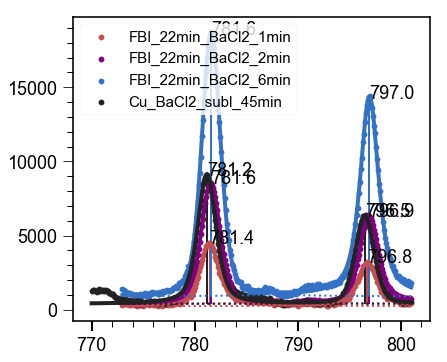

In [103]:
r = 'Ba_3d'
for xp in cubaproc[1:4]+[baclcu]:
    Fn = XPFit(xp, r)
    Fn.double_voigt()
    print(xp.name, xp.fit[r].best_values['v1_center'], xp.fit[r].best_values['v2_center'] - xp.fit[r].best_values['v1_center'])#  sep3d)
    Fn.plot()
# plt.gca().set(xlim=(775, 785))
plt.gca().legend()

13-Cu_FBI_subl_60min_BaCl2_4min 781.3224578039593 796.6260684505163
13-Cu_FBI_subl_60min_BaCl2_8min 781.2882260645138 796.5918367110708
13-Cu_FBI_subl_60min_BaCl2_12min 781.223535885114 796.527146531671


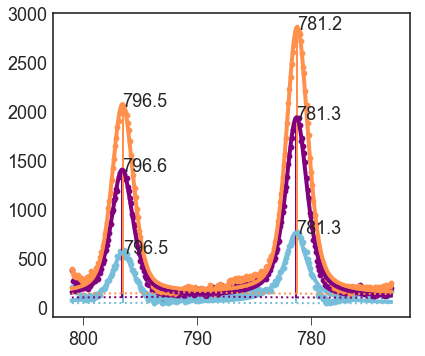

In [142]:
r = 'Ba_3d'
for xp in cubaproc2[1:4]:
    Fn = XPFit(xp, r)
    Fn.double_voigt()
    print(xp.name, xp.fit[r].best_values['v1_center'], xp.fit[r].best_values['v1_center'] - sep3d)
    Fn.plot()
    


13-Cu_FBI_subl_60min_BaCl2_4min 781.3224578039593 796.6260684505163
13-Cu_FBI_subl_60min_BaCl2_8min 781.2882260645138 796.5918367110708
13-Cu_FBI_subl_60min_BaCl2_12min 781.223535885114 796.527146531671


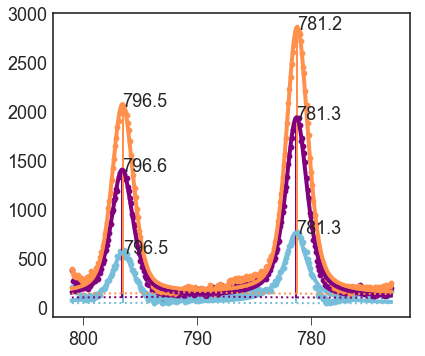

In [143]:
r = 'Ba_3d'
for xp in cubaproc2[1:4]:
    Fn = XPFit(xp, r)
    Fn.double_voigt()
    print(xp.name, xp.fit[r].best_values['v1_center'], xp.fit[r].best_values['v1_center'] - sep3d)
    Fn.plot()
    


13-Cu_FBI_subl_60min_BaCl2_4min 90.6063046608433 105.9099153074003
13-Cu_FBI_subl_60min_BaCl2_8min 90.73272906570452 106.03633971226151
13-Cu_FBI_subl_60min_BaCl2_12min 90.71640104490281 106.0200116914598


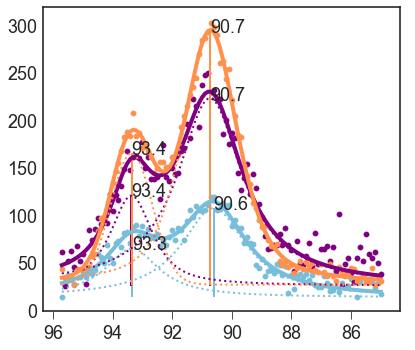

In [138]:
r = 'Ba_4d'
for xp in cubaproc2[1:4]:
    Fn = XPFit(xp, r)
    Fn.double_voigt(sepPt=91.2)
    print(xp.name, xp.fit[r].best_values['v1_center'], xp.fit[r].best_values['v1_center'] - sep3d)
    Fn.plot()

In [150]:
for xp in cubaproc2[1:4]:
    print(xp.fit['Ba_3d'].best_values['v1_center'] - xp.fit['Ba_4d'].best_values['v1_center'], 
          xp.fit['Ba_3d'].best_values['v2_center'] - xp.fit['Ba_4d'].best_values['v2_center'])
sep4d3 = xp.fit['Ba_3d'].best_values['v2_center'] - xp.fit['Ba_4d'].best_values['v2_center']
sep4d5 = xp.fit['Ba_3d'].best_values['v1_center'] - xp.fit['Ba_4d'].best_values['v1_center']

690.7161659193372 703.1854927609409
690.5557021977186 703.2162313039803
690.5071351638674 703.1857499189102


In [155]:
ba4d3 = np.array([92.8, 89.6, 90.4]) + sep4d3
ba4d5 = np.array([90.1, 87.0, 87.8]) + sep4d5
ba4d5

array([780.60713516, 777.50713516, 778.30713516])

In [158]:
ba4d5 - ba4d3, sep3d

(array([-15.37861476, -15.27861476, -15.27861476]), -15.30361064655699)

In [33]:
for xp in cubaproc:
    try:
        print(xp.name, xp.area['layers'] - cubaproc[0].area['layers'])
    except KeyError:
        pass

FBI_22min 0.0
FBI_22min_BaCl2_1min 0.45026216297239063
FBI_22min_BaCl2_2min 0.8310388487585783
FBI_22min_BaCl2_6min 2.363543000801661
FBI_22min_BaCl2_6min_200grad 2.3691884152594875
FBI_22min_BaCl2_6min_250grad 0.9595481051038479
FBI_22min_BaCl2_6min_300grad 0.25388905569401965


### Au (111)

In [46]:
path = '/Users/pabloherrero/sabat/xps_spectra/Au111_FBI/2021_05_21_Au111/**/*.uxy'

files = glob.glob(path, recursive=True)
files.sort()
files

aubaproc = [read_processed_xp(f) for f in files]
# aubaproc = [normalise_dfx(xp) for xp in aubaproc]

[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/Au111_FBI/2021_05_21_Au111/proc/20210520_Au111_clean.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/Au111_FBI/2021_05_21_Au111/proc/20210521_Au111_FBI_subl_45min.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/Au111_FBI/2021_05_21_Au111/proc/20210521_Au111_FBI_subl_45min_BaCl2_10s.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/Au111_FBI/2021_05_21_Au111/proc/20210522_Au111_FBI_subl_45min_BaCl2_20s.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/Au111_FBI/2021_05_21_Au111/proc/20210523_Au111_FBI_subl_45min_BaCl2_30s.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/Au111_FBI/2021_05_21_Au111/proc/20210523_Au

In [56]:
normfbiba = normalise_dfx(aubaproc[7])
normfbiba.color = 'b'
normbaau = normalise_dfx(baclau)

Au111_FBI_subl_45min_BaCl2_20s 780.9535112821534 796.2571219287104
Au111_FBI_subl_45min_BaCl2_30s 780.8334532377814 796.1370638843384
Au111_FBI_subl_45min_BaCl2_40s 780.9440868359391 796.247697482496
Au111_FBI_subl_45min_BaCl2_60s 780.8799742675936 796.1835849141506
Au111_FBI_subl_45min_BaCl2_80s 780.8423816329196 796.1459922794766


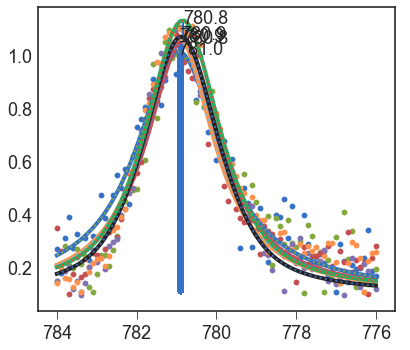

In [171]:
r = 'Ba_3d'
for xp in aubaproc[3:]:
    Fn = XPFit(xp, r)
    Fn.voigt()
    print(xp.name, xp.fit[r].best_values['v1_center'], xp.fit[r].best_values['v1_center'] - sep3d)
    Fn.plot()

Au111_FBI_subl_45min_BaCl2_80s 780.8364067231978 796.140601595657
Au111_BaCl2_subl_80s 780.8576400684875 796.1618349409467


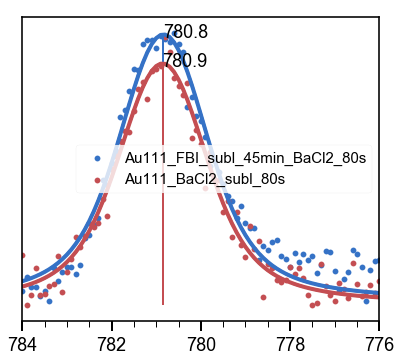

In [59]:
r = 'Ba_3d'
for xp in [normfbiba, normbaau]:
    Fn = XPFit(xp, r)
    Fn.voigt()
    print(xp.name, xp.fit[r].best_values['v1_center'], xp.fit[r].best_values['v1_center'] - sep3d)
    Fn.plot()
ax = plt.gca()
ax.set(yticks=[], xlim=(784, 776))
plt.legend()

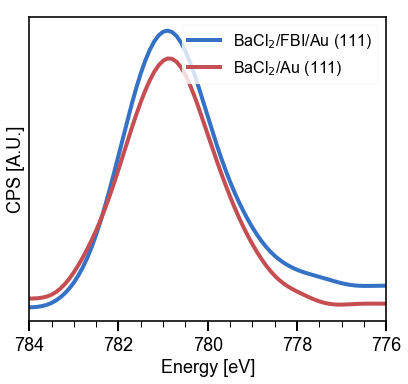

In [69]:
r = 'Ba_3d'

smo = [gaussian_smooth(xp, r, sigma=4) for xp in [normfbiba, normbaau]]
smo[0].name = 'BaCl$_2$/FBI/Au (111)'
smo[1].name = 'BaCl$_2$/Au (111)'

for xp in smo:
    plot_region(xp, r)
ax = plt.gca()
ax.set(yticks=[], xlim=(784, 776))
plt.legend(fontsize=16)

## Look for Ba MNN

[(20000.0, 88000.0), (910, 760)]

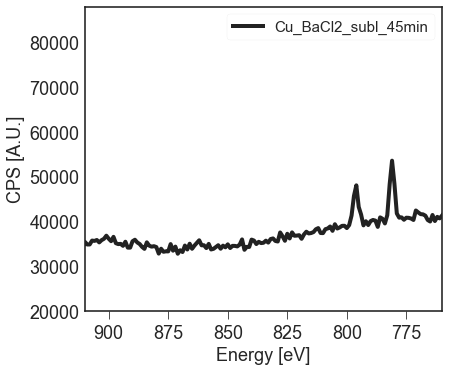

In [240]:
plot_region(baclcu, 'overview_')
plt.gca().set(xlim=(910, 760), ylim=(2e4, 8.8e4))

[(910, 760)]

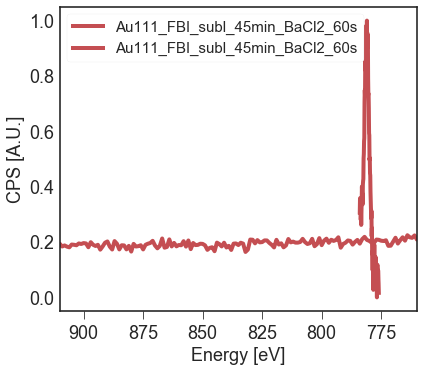

In [239]:
plot_region(raw3[-2], 'overview')
plot_region(raw3[-2], 'Ba_3d')

plt.gca().set(xlim=(910, 760))#, ylim=(2e4, 8.8e4))

[(910, 760)]

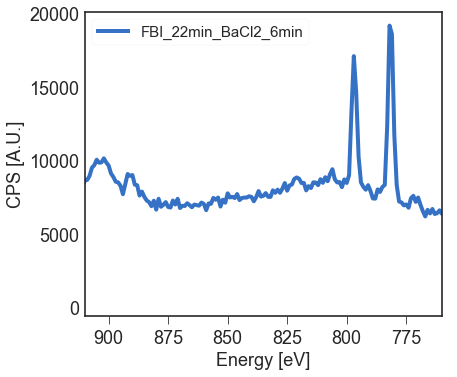

In [214]:
plot_region(cubaproc[3], 'overview_')
plt.gca().set(xlim=(910, 760))#, ylim=(2e4, 8.8e4))

[(4000.0, 48000.0), (925, 760)]

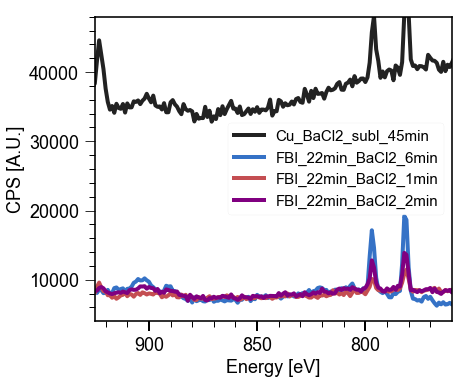

In [186]:

plot_region(baclcu, 'overview_')
plot_region(cubaproc[3], 'overview_')
# shift = find_shift(cubaproc[1], cubaproc[3], 'overview_')
# align_dfx(cubaproc[1], shift, inplace=True)
plot_region(cubaproc[1], 'overview_')
plot_region(cubaproc[2], 'overview_')


plt.gca().set(xlim=(925, 760), ylim=(4e3, 4.8e4))

[(4000.0, 18000.0), (925, 760)]

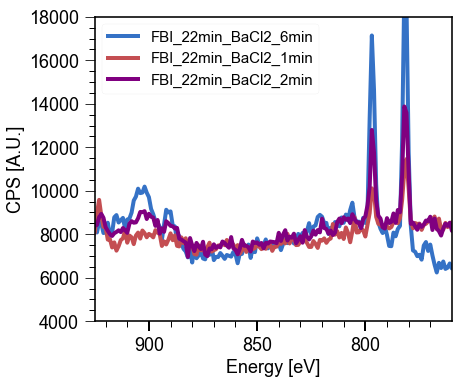

In [218]:
plot_region(cubaproc[3], 'overview_')
# shift = find_shift(cubaproc[1], cubaproc[3], 'overview_')
# align_dfx(cubaproc[1], shift, inplace=True)
plot_region(cubaproc[1], 'overview_')
plot_region(cubaproc[2], 'overview_')


plt.gca().set(xlim=(925, 760), ylim=(4e3, 1.8e4))

[(8800.0, 20000.0), (925, 760)]

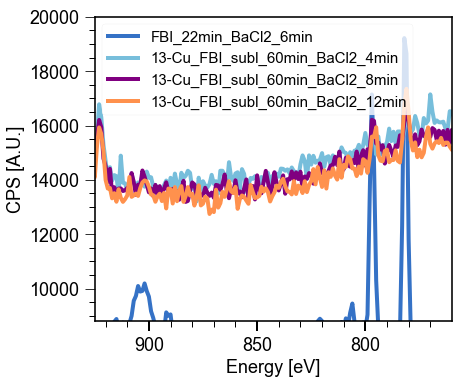

In [192]:

# plot_region(baclcu, 'overview_')
plot_region(cubaproc[3], 'overview_')
# shift = find_shift(cubaproc[1], cubaproc[3], 'overview_')
# align_dfx(cubaproc[1], shift, inplace=True)
plot_region(cubaproc2[1], 'overview_')
plot_region(cubaproc2[2], 'overview_')
plot_region(cubaproc2[3], 'overview_')



plt.gca().set(xlim=(925, 760), ylim=(8.8e3, 2e4))

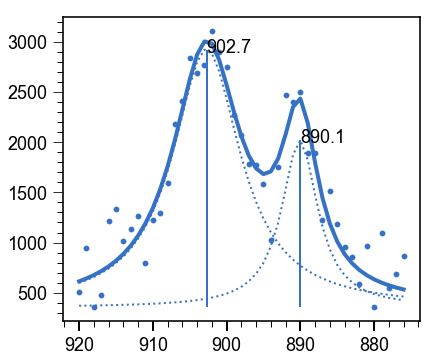

In [196]:
r = 'overview_'
xpc0 = crop_spectrum(cubaproc[3], 'overview_', eup=920, edw=876)
xpc0  = subtract_shirley_bg(xpc0, r, maxit=80)
plt.clf()
# plot_region(xpc, r)
Fn = XPFit(xpc0, r)
Fn.double_voigt(sepPt=895)
Fn.plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x1a2dfd3d68>, 417.0412807503378)

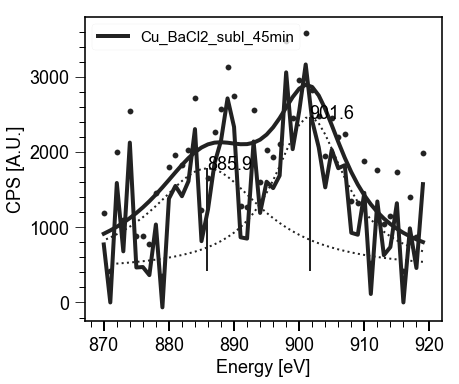

In [152]:
r = 'overview_'
xpc = crop_spectrum(baclcu, 'overview_', eup=919, edw=870)
xpc = subtract_shirley_bg(xpc, r, )
plt.clf()
plot_region(xpc, r)
Fn = XPFit(xpc, r)
Fn.double_voigt(sepPt=895)
plot_fit_result(xpc, r)

In [200]:
bamnn_shift = xpc0.fit['overview_'].best_values['v1_center'] - xpc0.fit['overview_'].best_values['v2_center']
bamnn_shift

-12.643979538739814

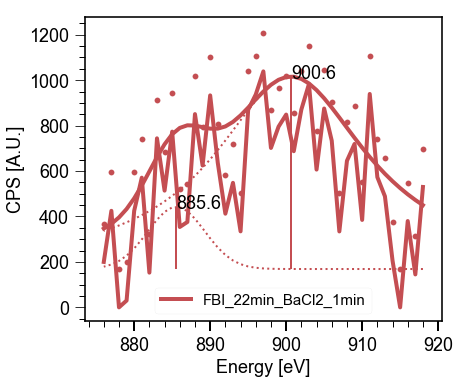

In [150]:
r = 'overview_'
xpc = crop_spectrum(cubaproc[1], 'overview_', eup=918, edw=876)
xpc = subtract_shirley_bg(xpc, r, maxit=80)
plt.clf()
plot_region(xpc, r)
Fn = XPFit(xpc, r)
Fn.double_voigt(sepPt=895)
Fn.plot()

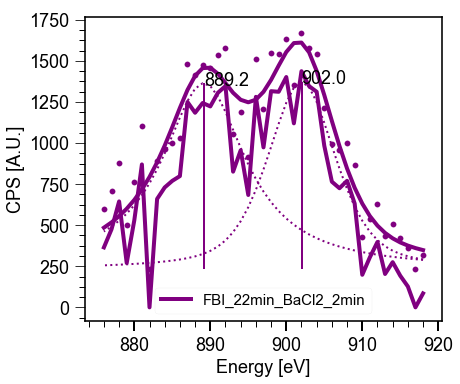

In [146]:
r = 'overview_'
xpc = crop_spectrum(cubaproc[2], 'overview_', eup=918, edw=876)
xpc = subtract_shirley_bg(xpc, r, maxit=80)
plt.clf()
plot_region(xpc, r)
Fn = XPFit(xpc, r)
Fn.double_voigt(sepPt=895)
Fn.plot()

### FBI 22 min, Ba-Cl2

888.3560204612602


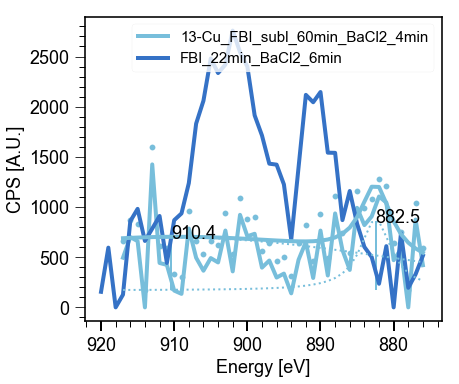

In [215]:
r = 'overview_'
xpc = crop_spectrum(cubaproc2[1], 'overview_', eup=917, edw=876)
xpc = subtract_shirley_bg(xpc, r, maxit=80)
plt.clf()
plot_region(xpc, r)

plot_region(xpc0, r)

Fn = XPFit(xpc, r)
Fn.double_voigt(sepPt=895)
Fn.plot()
print(901 + bamnn_shift)

889.1633154681766


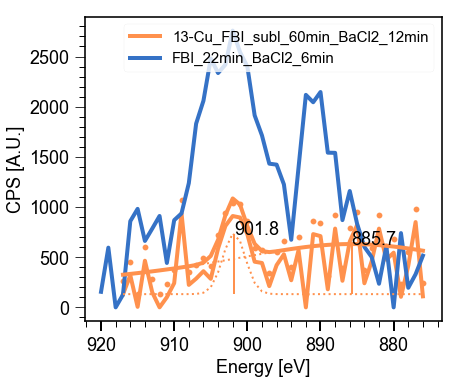

In [211]:
r = 'overview_'
xpc = crop_spectrum(cubaproc2[3], 'overview_', eup=917, edw=876)
xpc = subtract_shirley_bg(xpc, r, maxit=80)
plt.clf()
plot_region(xpc, r)

plot_region(xpc0, r)

Fn = XPFit(xpc, r)
Fn.double_voigt(sepPt=895)
Fn.plot()
print(xpc.fit['overview_'].best_values['v2_center'] + bamnn_shift)

889.9374230073505


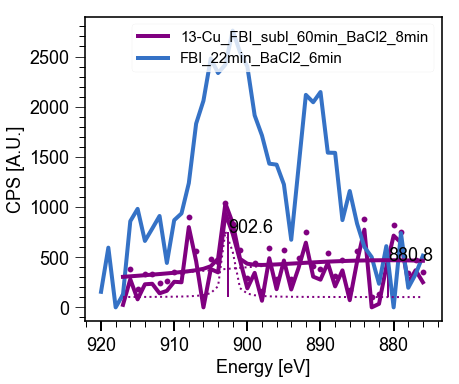

In [212]:
r = 'overview_'
xpc = crop_spectrum(cubaproc2[2], 'overview_', eup=917, edw=876)
xpc = subtract_shirley_bg(xpc, r, maxit=80)
plt.clf()
plot_region(xpc, r)

plot_region(xpc0, r)

Fn = XPFit(xpc, r)
Fn.double_voigt(sepPt=895)
Fn.plot()
print(xpc.fit['overview_'].best_values['v2_center'] + bamnn_shift)

In [207]:
xpc.fit['overview_'].best_values['v2_center'] + bamnn_shift

889.9374230073505

## Auger parameter

### BaCl2 
SURFACE AND INTERFACE ANALYSIS, VOL. 17, 6354dO (1991)

Measured with Mg Kα

##### $\alpha = KE(AES) - KE(PE) $

In [258]:
123.64

123.64

##### $\alpha = KE(AES) + BE(PE) $

In [259]:
592 + 786

1378

### Auger parameter for Ba metal

Journal of Electron Spectroscopy and Related Phenomena, 56 (1991) 217-240

In [122]:
596.5 - ( 1253.6 -  780.4 )

123.30000000000007

In [252]:
780.4 + 596.5

1376.9

### What we measure FBI(0.6 ML) - BaCl$_2$
We measure in Al Kα, so transforming from Al Kα to Mg Kα means:

$ h\nu_{Mg} - KE(Mg) = h\nu_{Al} - KE(Al)$

$ KE(Mg) = h\nu_{Mg} - h\nu_{Al} + KE(Al) = 233 - KE(Al)$

#### FBI (0.6 ML) -  BaCl$_2$ (0.5 ML) cubaproc[1]


##### $\alpha = KE(AES) - KE(PE) $

In [143]:
233 - (885.6 - 781.4)

128.79999999999995

#### FBI (0.6 ML) -  BaCl$_2$ (2.3 ML) cubaproc[2]

##### $\alpha = KE(AES) - KE(PE) $

In [147]:
233 - (889.2 - 781.6)

125.39999999999998

#### FBI (0.6 ML) -  BaCl$_2$ (2.3 ML) cubaproc[3]

##### $\alpha = KE(AES) - KE(PE) $

In [145]:
233 - (890.1 - 781.6)

124.5

### What we measure FBI(1.4 ML) - BaCl$_2$

#### FBI (1.4 ML) -  BaCl$_2$ (2.3 ML) cubaproc[3]

##### $\alpha = KE(AES) - KE(PE) $

In [217]:
233 - (888.3 - 781.2)

125.90000000000009

In [209]:
233 - (889.9 - 781.2)

124.30000000000007

In [213]:
233 - (889.16 - 781.2)

125.04000000000008

### What we measure: BaCl$_2$ only

#### Evaporated (very badly resolved Ba MNN)

##### $\alpha = KE(AES) - KE(PE) $

In [50]:
233 - (886 - 781.2)

128.20000000000005

##### Powder (see below) $\alpha = KE(AES) - KE(PE) $

In [130]:
233 - (896.7 - 786.7)

123.0

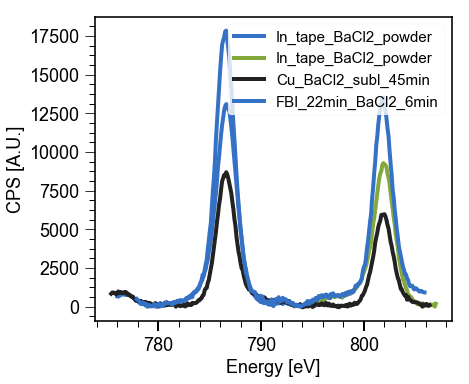

In [72]:
plot_region(bgpowder[0], 'Ba_3d_5/2')
plot_region(bgpowder[0], 'Ba_3d_3/2')

# baclcu.dfx.rename(columns={'Ba_3d':'Ba_3d_5/2'}, inplace=True)
shift = find_shift(baclcu, bgpowder[0], 'Ba_3d_5/2')
align_dfx(baclcu, shift, inplace=True)
plot_region(baclcu, 'Ba_3d_5/2')
# cubaproc[3].dfx.rename(columns={'Ba_3d':'Ba_3d_5/2'}, inplace=True)
shift = find_shift(cubaproc[3], bgpowder[0], 'Ba_3d_5/2')
align_dfx(cubaproc[3], shift, inplace=True)
plot_region(cubaproc[3], 'Ba_3d_5/2')

# plt.gca().invert_xaxis()

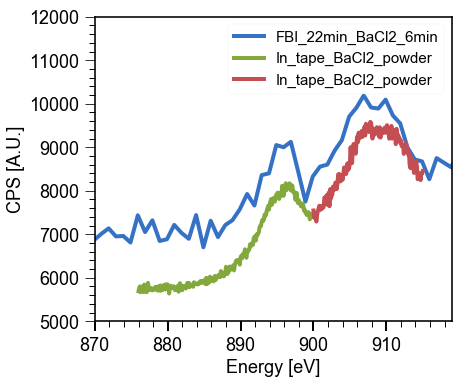

In [78]:
plot_region(cubaproc[3], 'overview_')
plt.gca().set(xlim=(919, 870), ylim=(5e3, 1.2e4))
# eup=919, edw=870)
# plt.gca().invert_xaxis()

plot_region(bapowder, 'Ba_MNN')
plot_region(bapowder, 'Ba_MNN_(3)')
# plt.gca().set(xlim=(919, 870), ylim=(3e4, 5e4))
# eup=919, edw=870)
plt.gca().invert_xaxis()

# BaCl2 powder

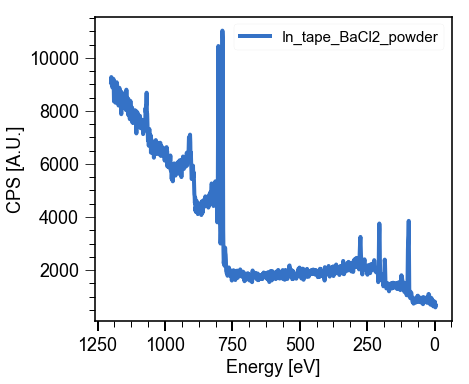

In [18]:
path = '/Users/pabloherrero/sabat/xps_spectra/BaCl2_powder/20210629_In_tape_BaCl2_powder.xy'
bapowder = xps_data_import(path)
plot_region(bapowder, 'overview')

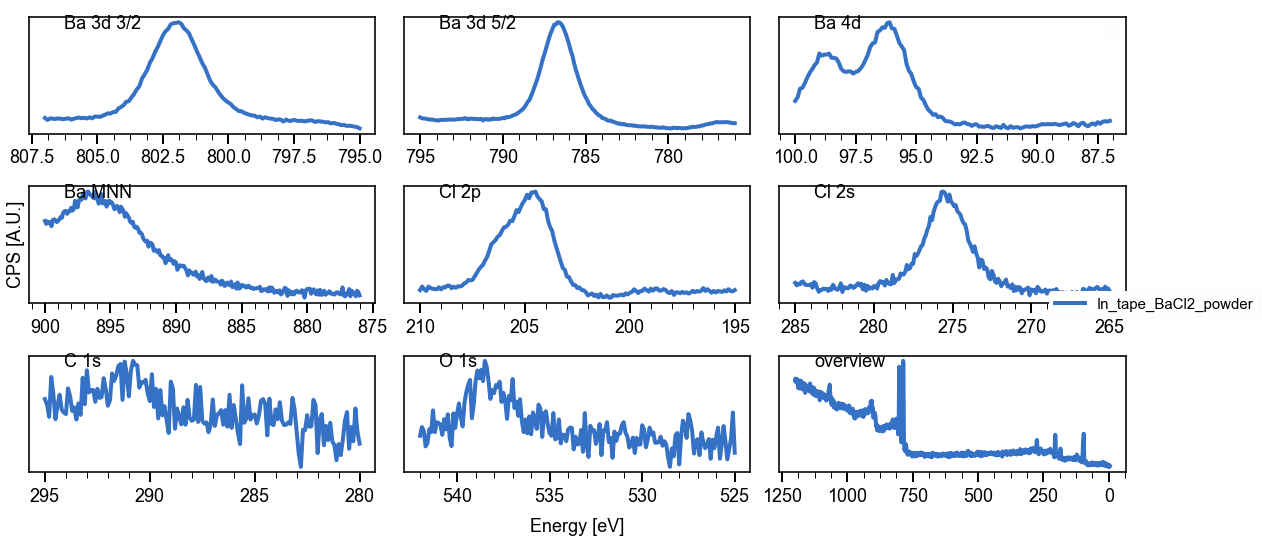

In [19]:
regs = ['Ba_3d_3/2', 'Ba_3d_5/2', 'Ba_4d', 'Ba_MNN', 'Cl_2p', 'Cl_2s', 'C_1s', 'O_1s']
plot_xp_regions([bapowder], regs+['overview']);

### Subtract bg

In_tape_BaCl2_powder Ba_3d_5/2
In_tape_BaCl2_powder Ba_3d_3/2
In_tape_BaCl2_powder Ba_4d
In_tape_BaCl2_powder Cl_2p
In_tape_BaCl2_powder Cl_2s


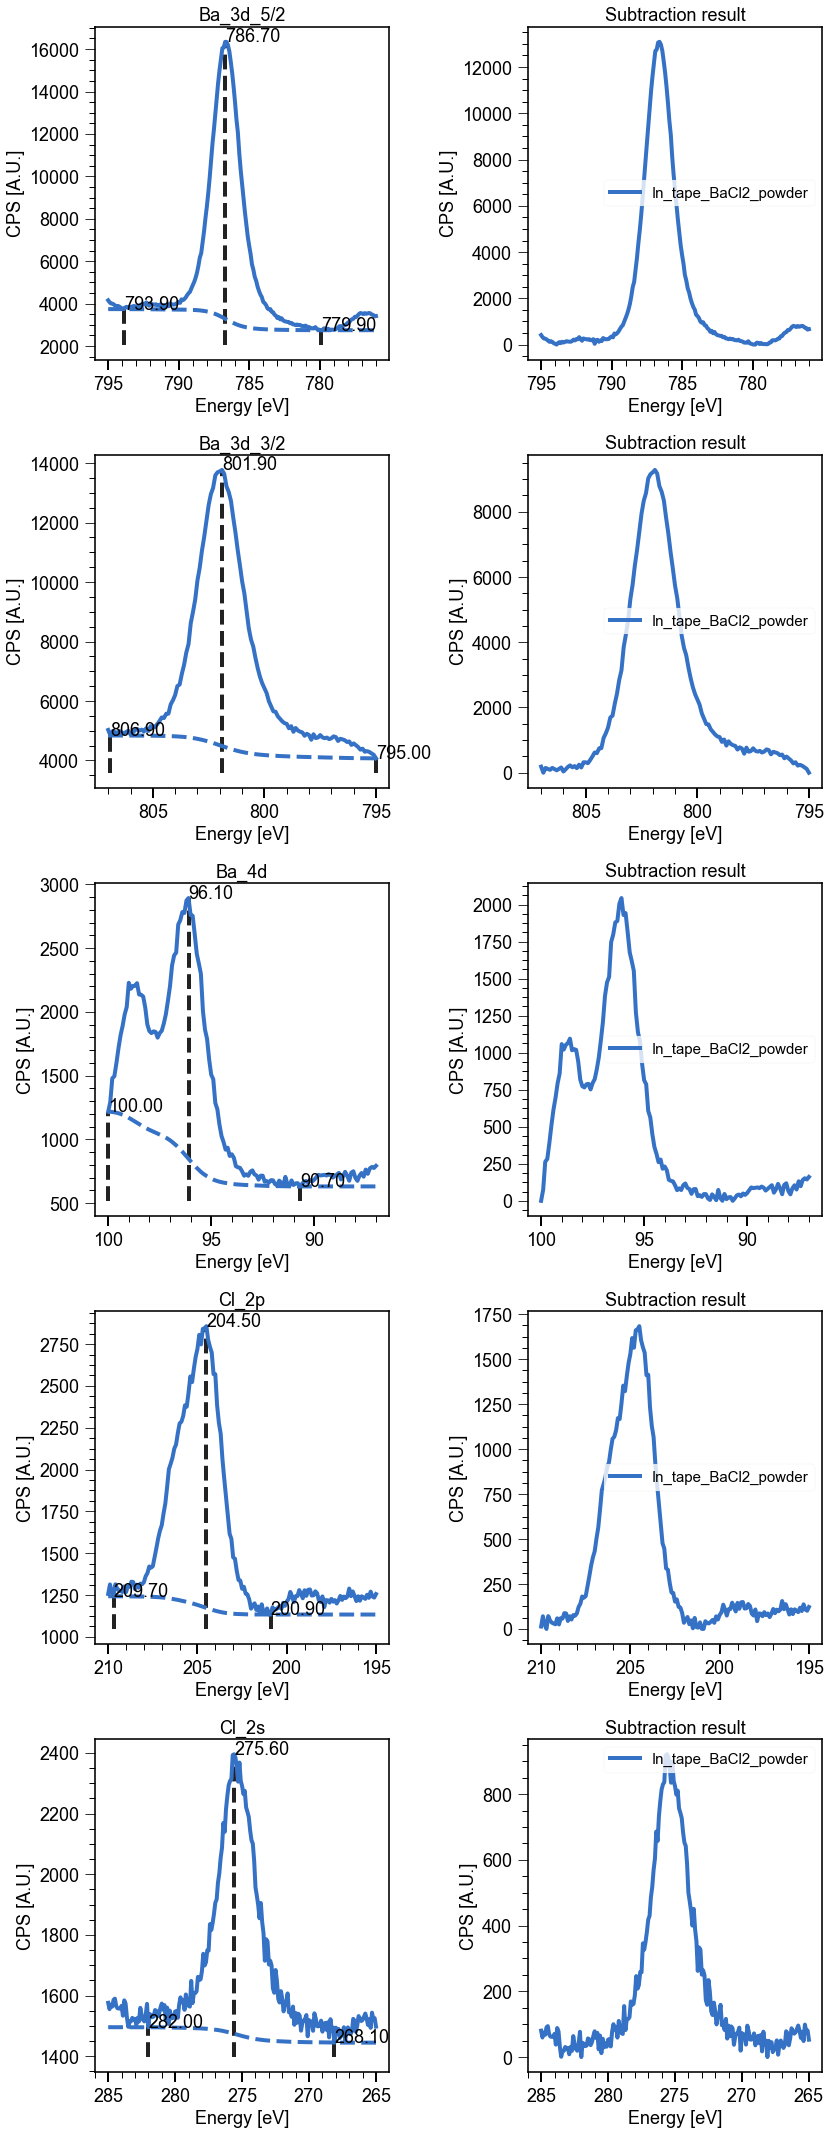

In [20]:
regs = ['Ba_3d_5/2', 'Ba_3d_3/2', 'Ba_4d', 'Cl_2p', 'Cl_2s']
bgpowder = bulk_bg_subtract([bapowder], regs)

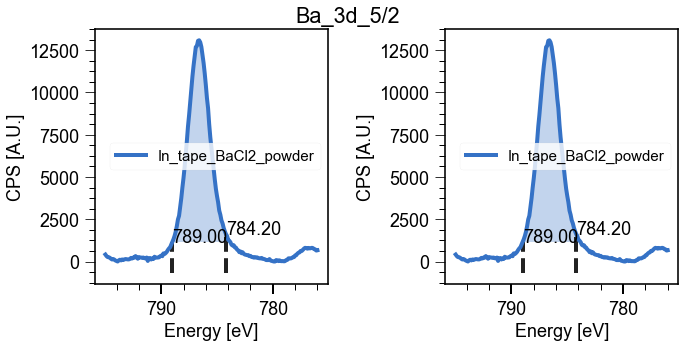

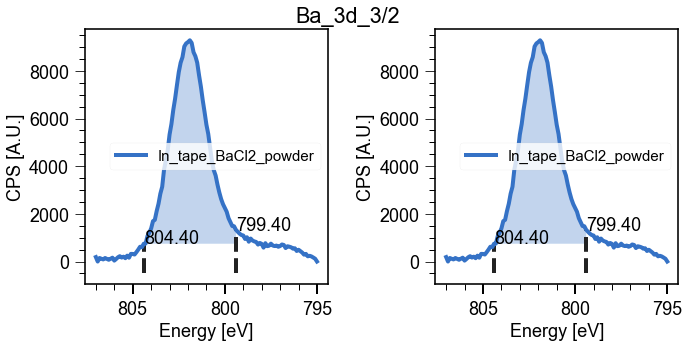

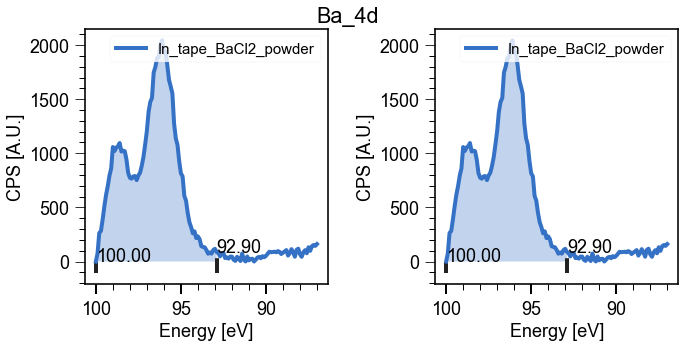

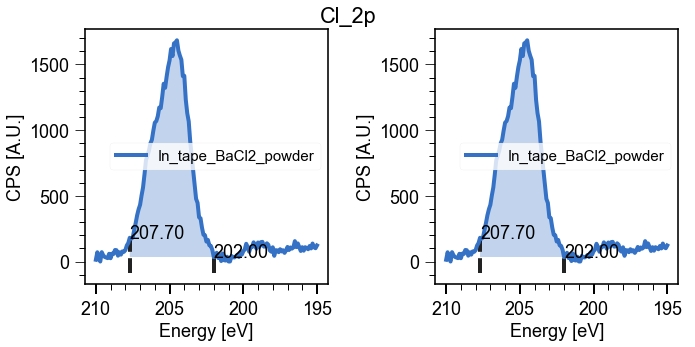

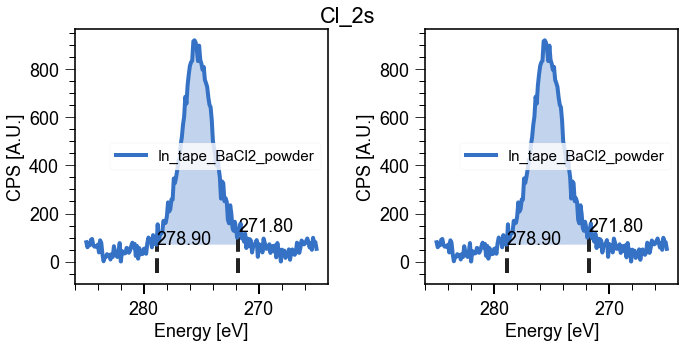

In [29]:
bgpowder[0].area={}
regs = ['Ba_3d_5/2', 'Ba_3d_3/2', 'Ba_4d', 'Cl_2p', 'Cl_2s']
eups = [789.0, 804.4, 100.2, 207.7, 278.9]
edws = [784.2, 799.4, 92.9, 202, 271.8]

for i,r in enumerate(regs):
    integrateRegions([bgpowder[0], bgpowder[0]], r, asf=asf, eup=eups[i], edw=edws[i])

In [22]:
asf2 = {'Ba_3d_5/2' : 25.8, 'Ba_3d_3/2': 17.9, 'Ba_4d': 5.86, 'Cl_2p': 2.28, 'Cl_2s': 1.69}

In [37]:
asf

{'C_1s': 0.296,
 'O_1s': 0.711,
 'N_1s': 0.477,
 'Ba_3d': 7.49,
 'Ba_3d_5/2': 7.49,
 'Ba_3d_3/2': 5.2,
 'Br_3p': 1.054,
 'Cu_2p': 5.321,
 'Ba_4d': 2.35,
 'Na_1s': 1.685,
 'Cl_2s': 0.37,
 'In3d': 4.359,
 'Sn3d': 4.725,
 'Cl_2p': 0.891,
 'Si2p': 0.339}

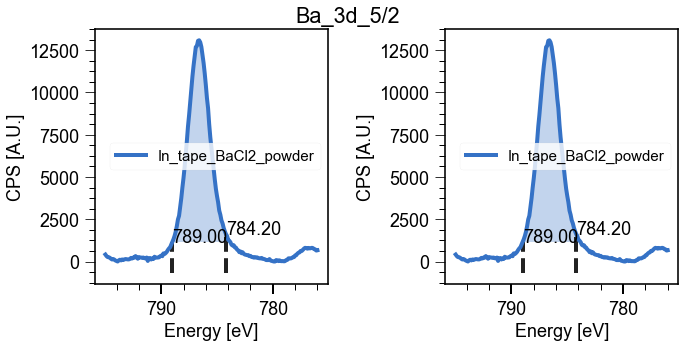

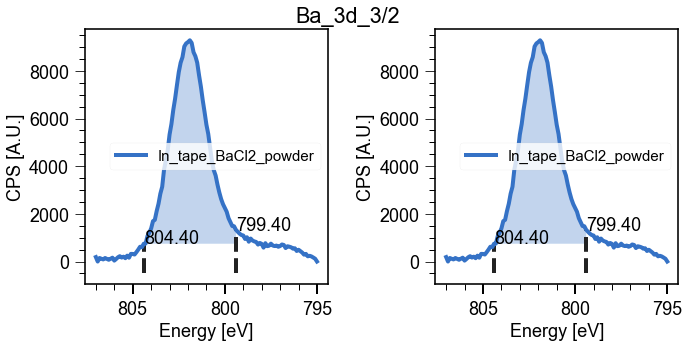

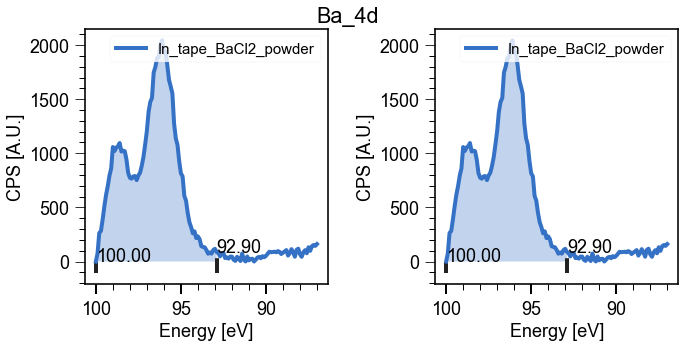

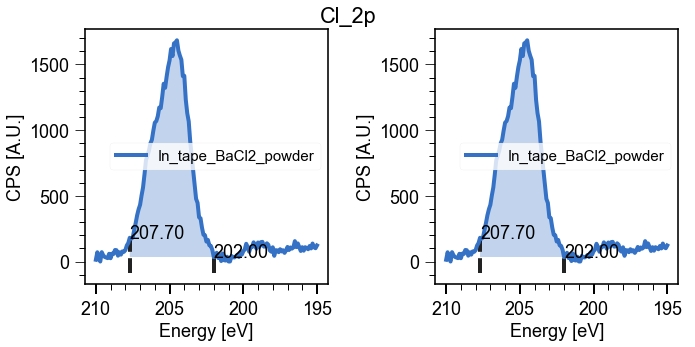

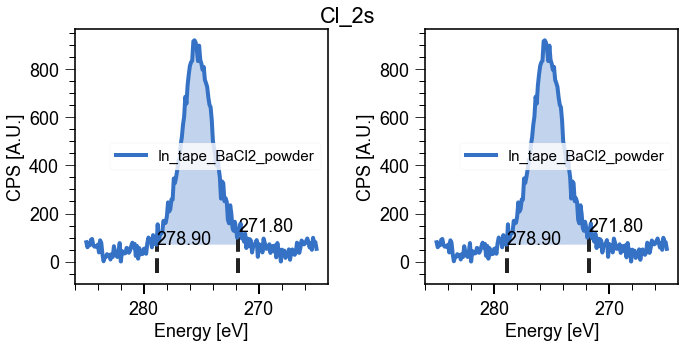

In [23]:
bgpowder[0].area={}
regs = ['Ba_3d_5/2', 'Ba_3d_3/2', 'Ba_4d', 'Cl_2p', 'Cl_2s']
eups = [789.0, 804.4, 100.2, 207.7, 278.9]
edws = [784.2, 799.4, 92.9, 202, 271.8]

for i,r in enumerate(regs):
    integrateRegions([bgpowder[0], bgpowder[0]], r, asf=asf2, eup=eups[i], edw=edws[i])

### Limits from fit 2$\sigma$

In [ ]:
def integrateRegions(exps: list, region : str,  asf: dict, indRef: int= None,
                     eup: float = None, edw: float = None,
                     lb : str = None, flag_fill : bool = True):
    """Integrate peaks for a list of experiments between two minima
       The minima are automatically located for exps[indRef] unless they are specified by eup and edw
    The boundary are fixed for the whole list."""

    if indRef == None: indRef = guess_xpRef(exps, region)

    xRef = exps[indRef].dfx[region].dropna().energy     # Use the energy array of reference xp to crop the other xp's

    if eup == None or edw == None:
        ind = flexible_integration_limits(exps[indRef], region=region, doublePeak=0, flag_plot=False)
        lmidx, rmidx = ind[-2:] # The index of the minima are always the last two
        eup, edw = xRef[lmidx], xRef[rmidx]

    fig, ax = plt.subplots(1, len(exps), figsize=(len(exps)*5, 5) )
    area = []
    for i, xp in enumerate(exps):
        try:
            y = xp.dfx[region].dropna().counts
        except KeyError as e:          #Check the region exists in this xp
            print(e, 'region does not exist in ' + xp.name)
            xp.area.update({region: 1e-10})
            continue

        x = xp.dfx[region].dropna().energy
        ax[i].plot(x, y, label=xp.name)

        xpCrop = crop_spectrum(xp, region, eup = eup, edw = edw)
        yc = xpCrop.dfx[region].dropna().counts.values
        xc = xpCrop.dfx[region].dropna().energy.values    # Integrate only in the cropped range

        step = x[0] - x[1]
        area.append(np.trapz(yc, dx=step))

        try:
            xp.area.update({region : area[-1]/asf[region]})
        except (KeyError, NameError) as e:
            print(e, ', asf missing, returning raw area')
            pass

        #### Plotting the operation

        if flag_fill:
            if yc[0] > yc[-1]:
                ax[i].fill_between(xc , y1 = yc[-1], y2 = yc, alpha=0.3)
            else:
                ax[i].fill_between(xc, y1 = yc[0], y2 = yc, alpha=0.3)
            ybase = ax[i].get_ylim()[0]

            for j in [0, -1]:
                ax[i].vlines(xc[j], ymin=ybase, ymax=yc[j], linestyles='--')
                ax[i].text(s='%.2f'%xc[j], x = xc[j], y = yc[j])
        cosmetics_plot(ax=ax[i])
    plt.tight_layout()
    fig.suptitle(region)
    return area

(271.78338194249625, 278.8828248927839)

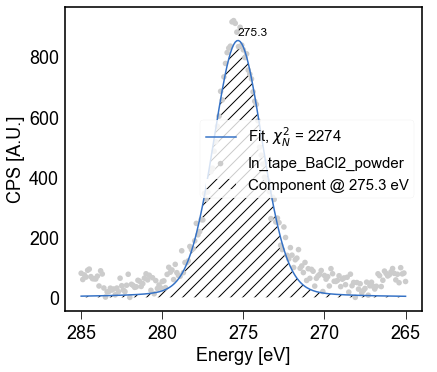

In [831]:
xp = bgpowder[0]
region = 'Cl_2s'
x = xp.dfx[region].dropna().energy
y = xp.dfx[region].dropna().counts

fitv = fit_voigt(xp, region)

fitv.best_values['v_center'] - 2*fitv.best_values['v_sigma'], fitv.best_values['v_center'] + 2*fitv.best_values['v_sigma']

In [564]:
#bgpowder[0].area['Ba_3d_5/2'] *= (1 + 2/3) 

## Stoichiometry

In [30]:
bgpowder[0].area['Cl_2p'] / bgpowder[0].area['Ba_3d_5/2']# + bgpowder[0].area['Ba_3d_3/2'])

1.241766469551856

In [31]:
bgpowder[0].area['Cl_2s'] / bgpowder[0].area['Ba_3d_5/2'] #+ bgpowder[0].area['Ba_3d_3/2'])

1.982769825450282

In [38]:
num = ['Cl_2p', 'Cl_2s', 'Cl_2p', 'Cl_2p']
denom = ['Ba_4d', 'Ba_4d', 'Cl_2s', 'Ba_3d_5/2']
make_stoichometry_table([bgpowder[0]], num=num, denom=denom)

Experiment	Cl_/Ba_	Cl_/Ba_	Cl_/Cl_	Cl_/Ba_	
In_tape_BaCl2_powder	2.08 	 3.32 	 0.63 	 1.24 	 


In [33]:
bgpowder[0].area['Ba_4d'] / bgpowder[0].area['Ba_3d_5/2']# + bgpowder[0].area['Ba_3d_3/2'])

0.5972442864016588

In [34]:
num = ['Cl_2p']
denom = ['Ba_3d']
make_stoichometry_table([baclau, baclcu], num=num, denom=denom)

Experiment	Cl_/Ba_	
Au111_BaCl2_subl_320s	1.06 	 
Cu_BaCl2_subl_45min	1.21 	 


### With ASF2

In [90]:
bgpowder[0].area['Cl_2p'] / bgpowder[0].area['Ba_3d_5/2']# + bgpowder[0].area['Ba_3d_3/2'])

1.6715550118733842

In [28]:
bgpowder[0].area['Cl_2s'] / bgpowder[0].area['Ba_3d_5/2']# + bgpowder[0].area['Ba_3d_3/2'])

1.4952892419674668

In [39]:
num = ['Cl_2p', 'Cl_2s', 'Cl_2p', 'Cl_2p']
denom = ['Ba_4d', 'Ba_4d', 'Cl_2s', 'Ba_3d_5/2']
make_stoichometry_table([bgpowder[0]], num=num, denom=denom)

Experiment	Cl_/Ba_	Cl_/Ba_	Cl_/Cl_	Cl_/Ba_	
In_tape_BaCl2_powder	2.08 	 3.32 	 0.63 	 1.24 	 


In [40]:
bgpowder[0].area['Ba_4d'] / bgpowder[0].area['Ba_3d_5/2'] #+ bgpowder[0].area['Ba_3d_3/2'])

0.5972442864016588

## Conclusions

- All areas are integrated in a 4-sigma interval, so the discrepancy in stoichiometry cannot come from there.

- All ASF2 values (Scofield) yield stoichiometries that agree better with expectation than Wagner's ASF.

- The ASF2 values are:
    - Overestimated for Cl 2s by a factor 1.12. The correct value is 1.50
    - Underestimated for Ba 3d 5/2 by a factor 2.5. The correct value is 64.3
    - Underestimated for Ba 3d 3/2 by a factor 2.8. The correct value is 49.9
    
- UPDATE (after talk with Celia): The ASF values are correct, but if one uses asf[Ba 3d 5/2], then only Ba 3d 5/2 peak should be integrated, NOT BOTH.

The source of error was summing both areas

In [37]:
## asf3 = {'Ba_3d_5/2' : 64.3, 'Ba_3d_3/2': 49.9, 'Ba_4d': 5.86, 'Cl_2p': 2.28, 'Cl_2s': 1.50}

##  Auger parameter

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2d4b24a8>,
      dtype=object)

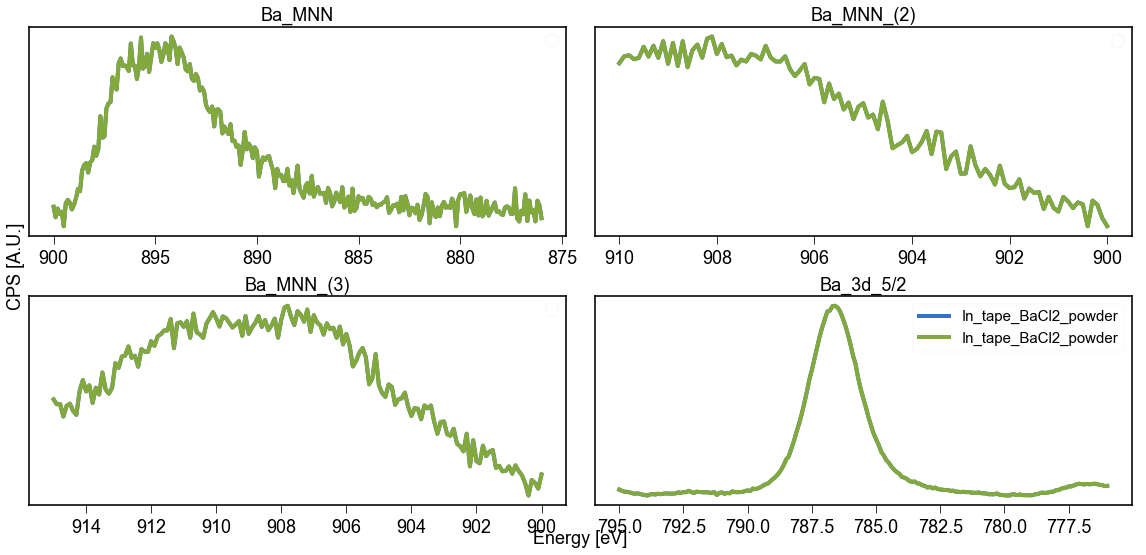

In [47]:
regs = ['Ba_MNN', 'Ba_MNN_(2)', 'Ba_MNN_(3)', 'Ba_3d_5/2']
plot_xp_regions(bgpowder+bgpowder, regs, ncols=2)

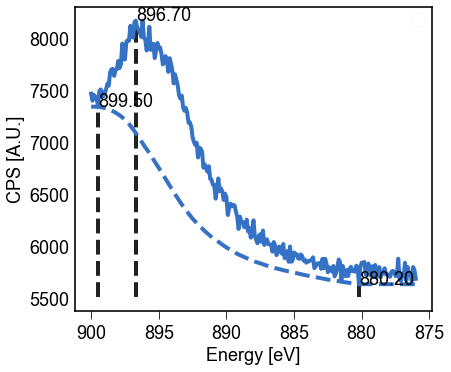

In [46]:
bgpowder[0] = subtract_shirley_bg(bgpowder[0], 'Ba_MNN', maxit=80)

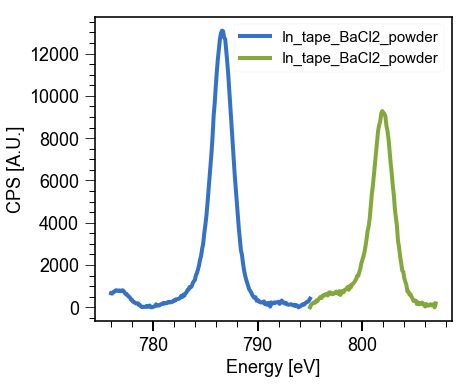

In [127]:
# plot_region(bgpowder[0], 'Ba_MNN')
plot_region(bgpowder[0], 'Ba_3d_5/2')
plot_region(bgpowder[0], 'Ba_3d_3/2')

In [128]:
233 - (896.7 - 786.7)

123.0

##### $\alpha = KE(AES) - KE(PE) $

In [129]:
233 - (896.7 - 786.7)

123.0

# Simulation BaCl2 on powder In

In [972]:
path = '/Users/pabloherrero/sabat/xps_spectra/BaCl2_powder/BaCl2_bulk.dat'
df = pd.read_csv(path, skiprows=10, sep='\t', names=['energy', 'counts', 'no'])
df = df.drop('no', axis=1)
df.energy = 1486.6 - df.energy
df.counts /= df.counts.max()
# df.set_index('energy', drop=True, inplace=True)
mi = pd.MultiIndex.from_product([['overview'], np.array(['energy', 'counts'])])
mi.to_frame()
df.columns = mi

xpsim = XPS_experiment(path = path, name='BaCl2_simulation', dfx=df, area={}, fit={})

In [5]:
def import_simulation_file(path: str, ke: bool = False) -> XPS_experiment:
    """Import SESSA .dat simulation data. If ke flag is True: convert KE to BE
        Return XPS_experiment with dfx containing only overview region"""
    filename = os.path.split(path)[1]
    name = os.path.splitext(filename)[0]
    
    df = pd.read_csv(path, skiprows=10, sep='\t', names=['energy', 'counts', 'no'])
    df = df.drop('no', axis=1)
    if ke:
        df.energy = 1486.6 - df.energy
    df.counts /= df.counts.max() # Normalization to 1
    # df.set_index('energy', drop=True, inplace=True)
    mi = pd.MultiIndex.from_product([['overview'], np.array(['energy', 'counts'])])
    mi.to_frame()
    df.columns = mi

    xpsim = XPS_experiment(path = path, name=name, dfx=df, area={}, fit={})
    return xpsim

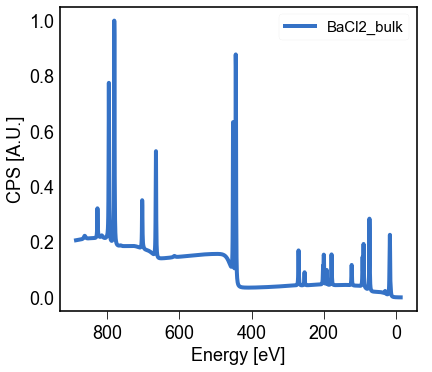

In [6]:
path = '/Users/pabloherrero/sabat/xps_spectra/BaCl2_powder/BaCl2_bulk.dat'
xpsim = import_simulation_file(path, ke=True)
plot_region(xpsim, 'overview')

## Splice dfx in ROIs

In [973]:
regs = ['Ba_3d_5/2', 'Ba_3d_3/2', 'Ba_4d', 'Cl_2p', 'Cl_2s']
eups = [800, 787, 97, 210, 280]
edws = [787, 775, 85, 195, 260]
for i, r in enumerate(regs):
    xpc = crop_spectrum(xpsim, 'overview', eup=eups[i], edw=edws[i])
    xpc.dfx.rename(columns={'overview':r}, inplace=True)
    insert_dfx_region(xpsim, xpc, r, inplace=True)
xpsim.dfx

Ba_3d_3/2           Ba_3d_5/2             Ba_4d              Cl_2p  \
        energy    counts    energy    counts  energy    counts   energy   
0     786.8441  0.204922  799.5883  0.229650  96.903  0.043026  209.842   
1     786.4047  0.205696  799.1488  0.233532  96.463  0.043658  209.403   
2     785.9652  0.206911  798.7094  0.239486  96.024  0.044576  208.963   
3     785.5258  0.208701  798.2699  0.249041  95.584  0.045938  208.524   
4     785.0863  0.211274  797.8305  0.265089  95.145  0.048032  208.084   
...        ...       ...       ...       ...     ...       ...      ...   
2043       NaN       NaN       NaN       NaN     NaN       NaN      NaN   
2044       NaN       NaN       NaN       NaN     NaN       NaN      NaN   
2045       NaN       NaN       NaN       NaN     NaN       NaN      NaN   
2046       NaN       NaN       NaN       NaN     NaN       NaN      NaN   
2047       NaN       NaN       NaN       NaN     NaN       NaN      NaN   

                overview              Cl_2s            
        counts    energy    counts   energy    counts  
0     0.046793  886.6000  0.206537  279.715  0.043394  
1     0.046865  886.1605  0.206634  279.276  0.043449  
2     0.046953  885.7211  0.206731  278.836  0.043514  
3     0.047064  885.2816  0.206827  278.397  0.043590  
4     0.047203  884.8422  0.206923  277.957  0.043680  
...        ...       ...       ...      ...       ...  
2043       NaN  -11.2030  0.000237      NaN       NaN  
2044       NaN  -11.6420  0.000231      NaN       NaN  
2045       NaN  -12.0820  0.000225      NaN       NaN  
2046       NaN  -12.5210  0.000219      NaN       NaN  
2047       NaN  -12.9610  0.000213      NaN       NaN  

[2048 rows x 12 columns]

In [7]:
def splice_dfx(xp: XPS_experiment, region: str, eup: float, edw: float) -> XPS_experiment:
    """Select a region of the spectrum overview and insert it in the dfx"""
    try:
        xpc = crop_spectrum(xp, 'overview', eup=eup, edw=edw)
        xpc.dfx.rename(columns={'overview':region}, inplace=True)
        
    except KeyError:
        xpc = crop_spectrum(xp, 'overview_', eup=eup, edw=edw)
        xpc.dfx.rename(columns={'overview_':region}, inplace=True)
        
    insert_dfx_region(xp, xpc, region, inplace=True)
    return xp

In [990]:
asf4 = {'Ba_3d_5/2': 25.8, 'Ba_3d_3/2': 17.9,
 'Ba_4d': 8.13, 'Cl_2p': 3.08, 'Cl_2s': 1.28}

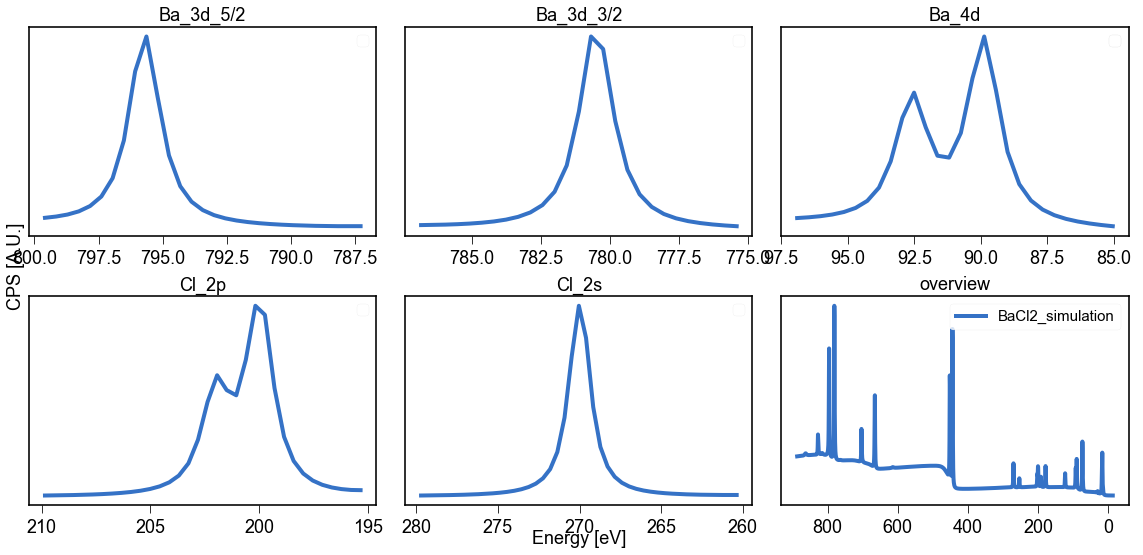

In [974]:
plot_xp_regions([xpsim], regs+['overview']);

## Bg subtraction and scale

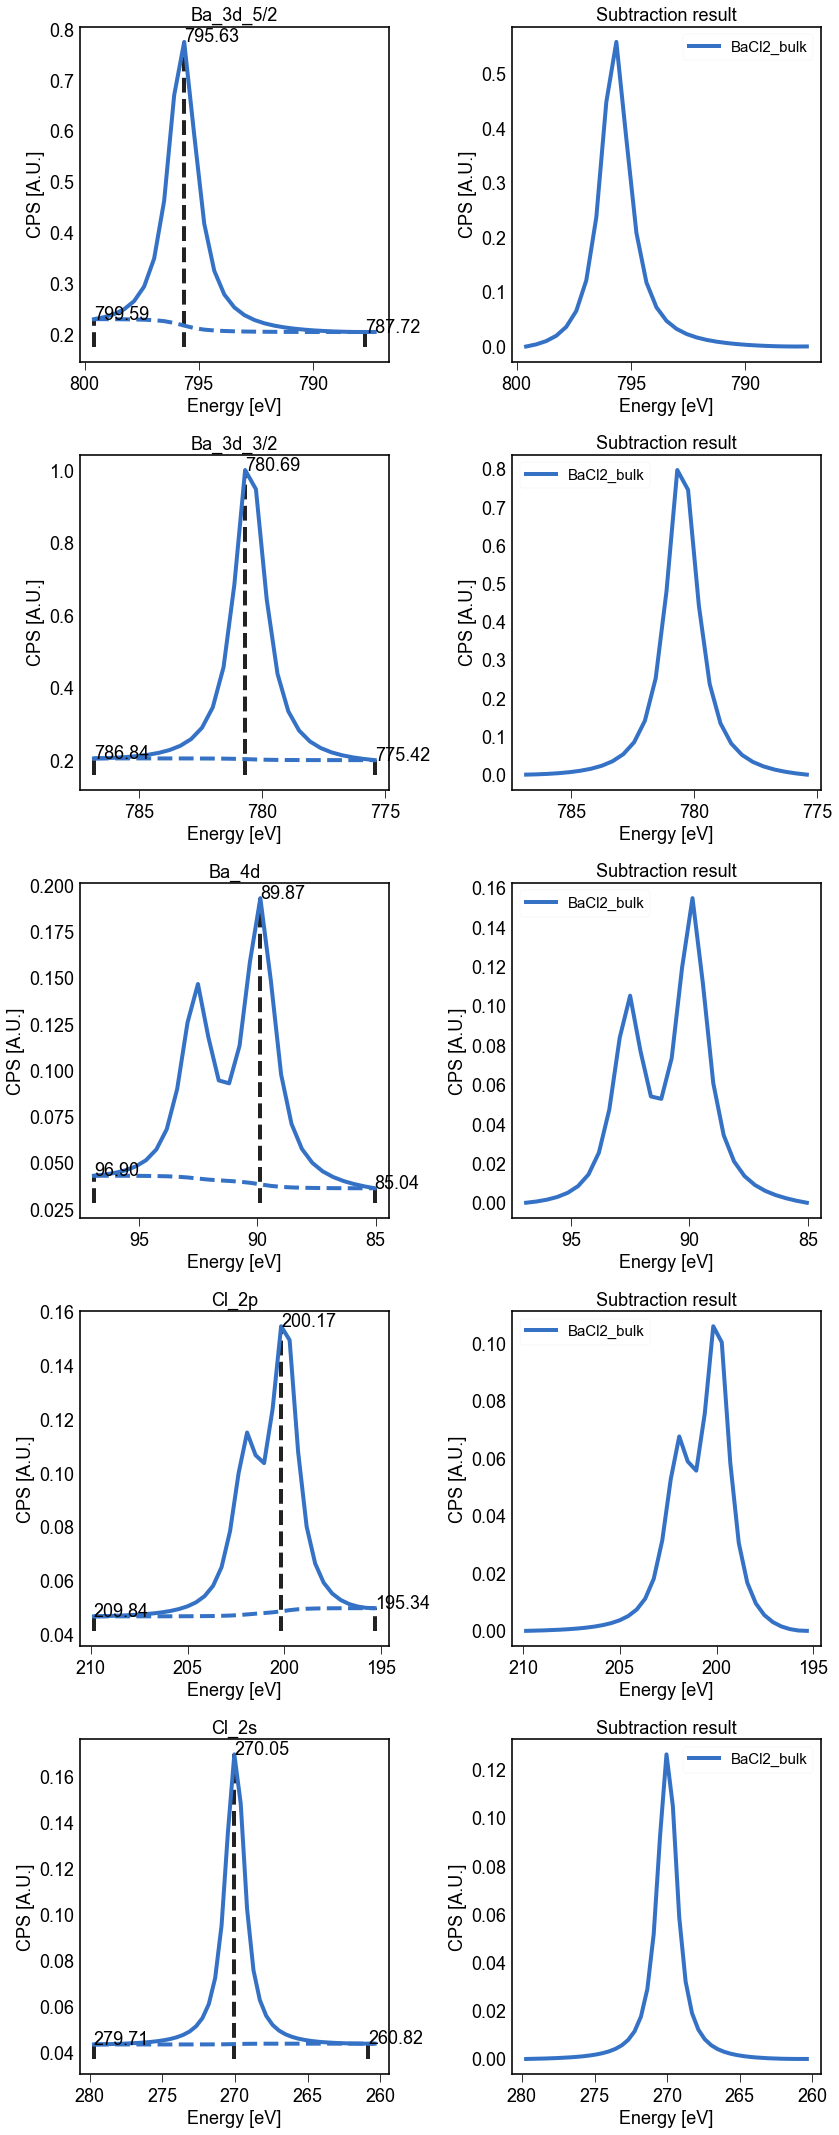

In [9]:
[bgsim] = bulk_bg_subtract([xpsim], regs)

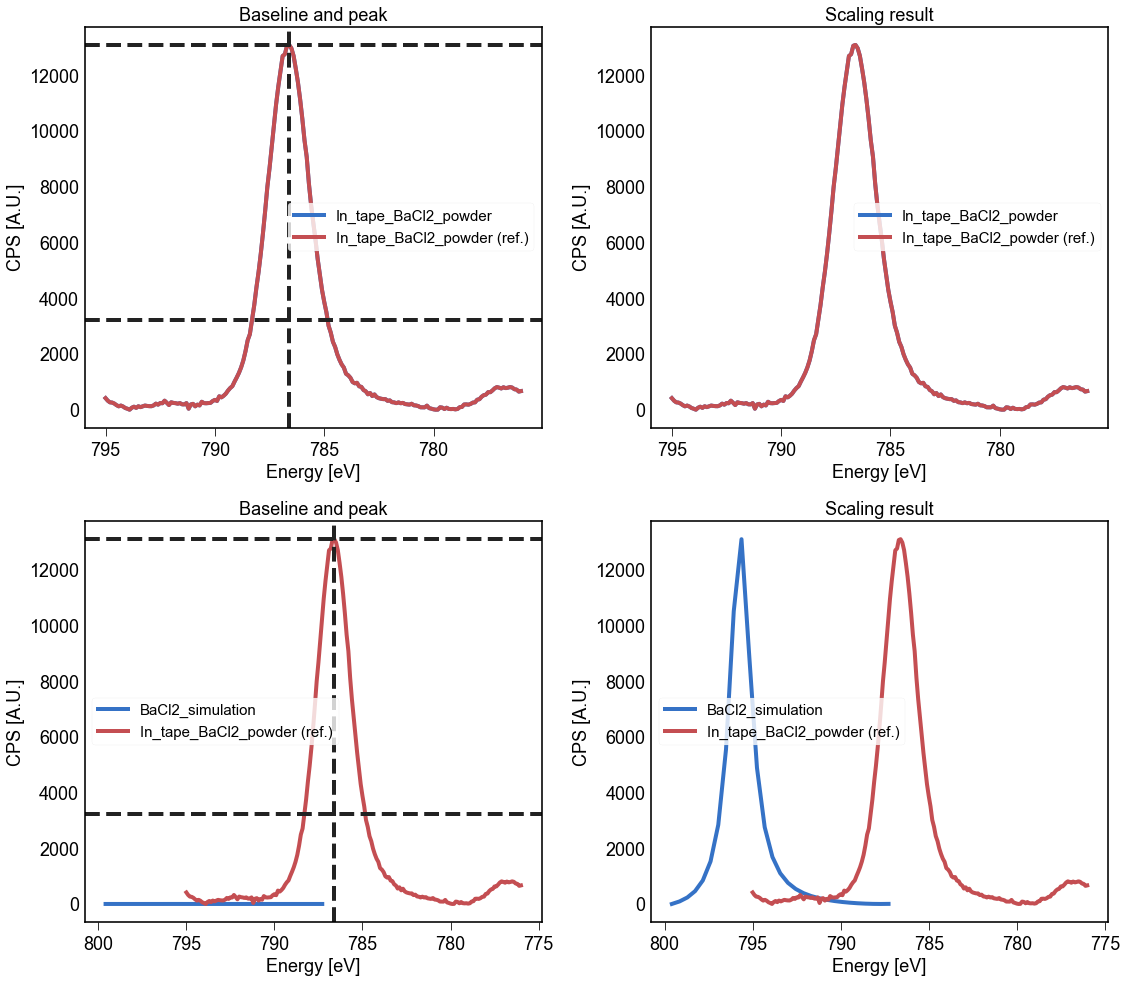

In [965]:
scaled = scale_and_plot_spectra([bgpowder[0], bgsim], indRef=0, region='Ba_3d_5/2')

In [969]:
shift = find_shift(scaled[0], scaled[1], region='Cl_2p')
align_dfx(scaled[0], shift=shift, inplace=True);

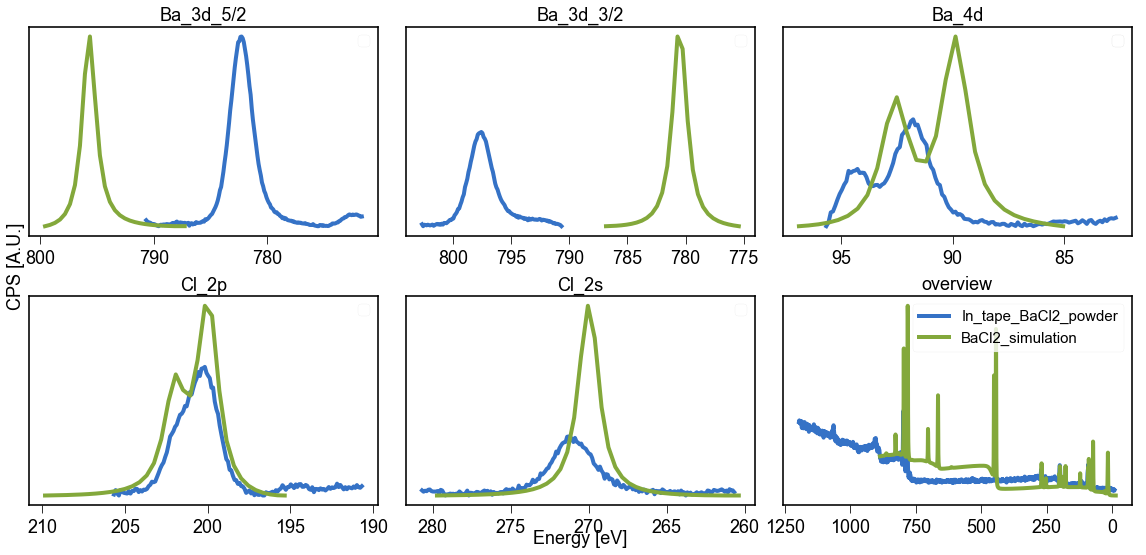

In [970]:
plot_xp_regions(scaled, regs+['overview']);

## Area fitting and integration

In [38]:
xp = bgsim
nsigma = 6
# fig, ax = plt.subplots(1, len(regs), figsize=(18, 6))
r = 'Ba_4d'
def integratePeak(xp: XPS_experiment, region: str, asf: dict, nsigma: int = 4, 
                  fitm: str = ['v', 'dv'], sepPt: float = None, flag_fill: bool = True):
    Fn = XPFit(xp, region)
    if fitm == 'dv':
        fitv = Fn.double_voigt(sepPt)
        edw = fitv.best_values['v1_center'] - nsigma*fitv.best_values['v1_sigma']
        eup = fitv.best_values['v2_center'] + nsigma*fitv.best_values['v2_sigma']

    else:
        fitv = Fn.voigt()        
        edw = fitv.best_values['v1_center'] - nsigma*fitv.best_values['v1_sigma']
        eup = fitv.best_values['v1_center'] + nsigma*fitv.best_values['v1_sigma']
        
    Fn.plot()
    ax = plt.gca()
    xpCrop = crop_spectrum(xp, region, eup = eup, edw = edw, )
    yc = xpCrop.dfx[region].dropna().counts.values
    xc = xpCrop.dfx[region].dropna().energy.values    # Integrate only in the cropped range

    area = np.trapz(yc, dx= xc[0] - xc[1])

    try:
        xp.area.update({region : area/asf[region]})
    except (KeyError, NameError) as e:
        print(e, ', asf missing, storing raw area')
        xp.area.update({region : area})        

    #### Plotting the operation

    if flag_fill:
        if yc[0] > yc[-1]:
            ax.fill_between(xc , y1 = yc[-1], y2 = yc, color='b', alpha=0.3)
        else:
            ax.fill_between(xc, y1 = yc[0], y2 = yc, color='b', alpha=0.3)
        ybase = ax.get_ylim()[0]
        for j in [0, -1]:
            ax.vlines(xc[j], ymin=ybase, ymax=yc[j], linestyles='--')
            ax.text(s='%.2f'%xc[j], x = xc[j], y = yc[j])

In [50]:
regs = ['Ba_4d', 'Ba_3d_5/2', 'Ba_3d_3/2', 'Cl_2p', 'Cl_2s']

In [52]:
asf = dict({'C_1s' : 0.296, 'O_1s' : 0.711, 'N_1s' : 0.477, 'Ba_3d' : 7.49, 'Ba_3d_5/2' : 7.49, 'Ba_3d_3/2' : 7.49,
            'Br_3p' : 1.054, 'Cu_2p' : 5.321, 'Ba_4d': 2.35, 'Na_1s' : 1.685, 'Cl_2s' : 0.37,
           'In3d' : 4.359, 'Sn3d' : 4.725, 'Cl_2p' : 0.891, 'Si2p': 0.339})

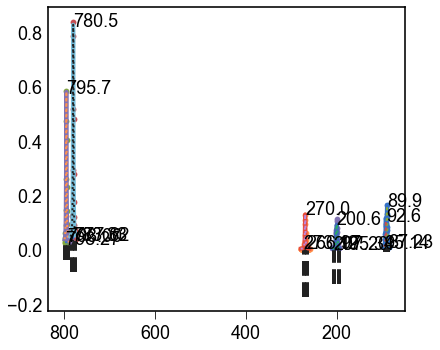

In [53]:
integratePeak(bgsim, r, asf=asf, fitm='dv', sepPt=91)
for r in regs[1:]:
    integratePeak(bgsim, r, asf=asf, fitm='v')
    

In [54]:
bgsim.area['Ba_3d_5/2'] / bgsim.area['Ba_3d_3/2']

0.6555141424067613

In [55]:
bgsim.area['Cl_2p'] / bgsim.area['Ba_3d_5/2']

2.6374699889291935

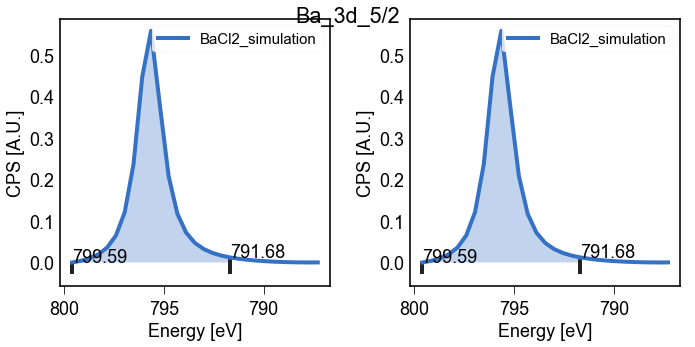

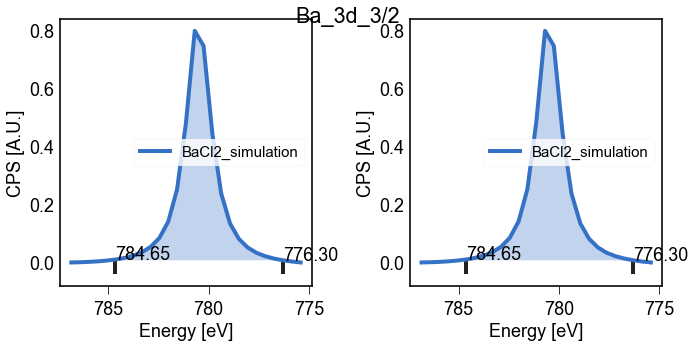

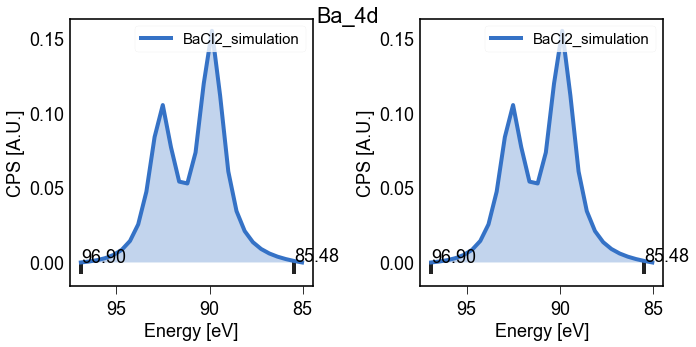

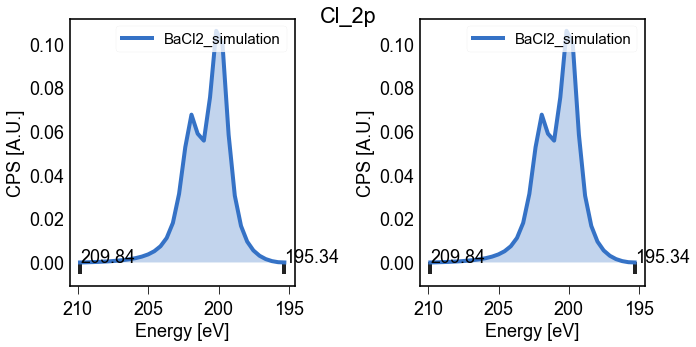

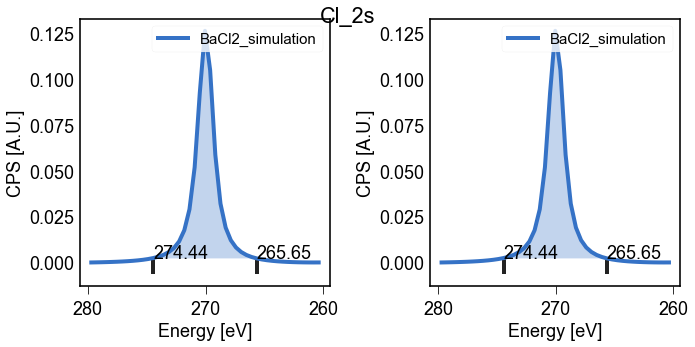

In [1011]:
xp = bgsim
nsigma = 6
for r in regs:
#     region = 'Cl_2s'
    Fn = XPFit(xp, r)
    if r == 'Ba_4d':
        fitv = Fn.double_voigt(91)
        edw = fitv.best_values['v1_center'] - nsigma*fitv.best_values['v1_sigma']
        eup = fitv.best_values['v2_center'] + nsigma*fitv.best_values['v2_sigma']
    else:
        fitv = Fn.voigt()
#     Fn.plot(ax=plt.gca())

        edw = fitv.best_values['v1_center'] - nsigma*fitv.best_values['v1_sigma']
        eup = fitv.best_values['v1_center'] + nsigma*fitv.best_values['v1_sigma']

    integrateRegions([xp, xp], r, asf=asf3, eup=eup, edw=edw, )

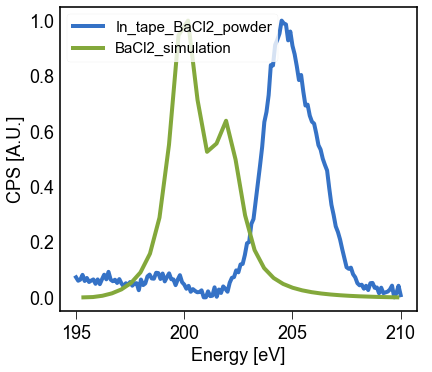

In [930]:
plot_region(normalise_dfx(bgpowder[0]), 'Cl_2p')
plot_region(normalise_dfx(xp), 'Cl_2p')

## Stoichiometry

### ASF 3

In [1012]:
bgsim.area['Cl_2p'] / (bgsim.area['Ba_3d_5/2'] + bgsim.area['Ba_3d_3/2'])

2.8920888404711547

In [932]:
bgsim.area['Cl_2s'] / (bgsim.area['Ba_3d_5/2'] + bgsim.area['Ba_3d_3/2'])

3.6152035246999494

In [1013]:
num = ['Cl_2p', 'Cl_2s', 'Cl_2s']
denom = ['Ba_4d', 'Ba_4d', 'Cl_2p']
make_stoichometry_table([bgsim], num=num, denom=denom)

Experiment	Cl_/Ba_	Cl_/Ba_	Cl_/Cl_	
BaCl2_simulation	1.72 	 2.15 	 1.25 	 


In [1014]:
bgsim.area['Ba_4d'] / (bgsim.area['Ba_3d_5/2'] + bgsim.area['Ba_3d_3/2'])

1.684617301427095

### ASF2

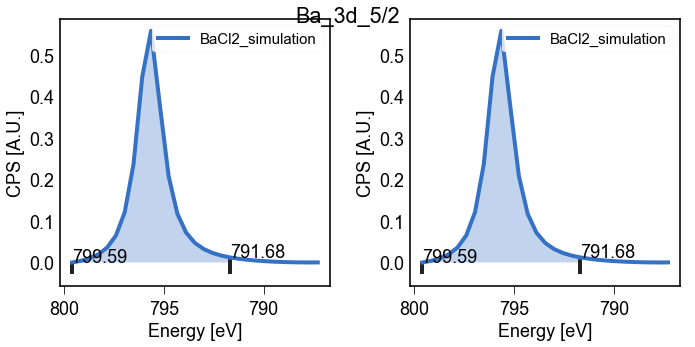

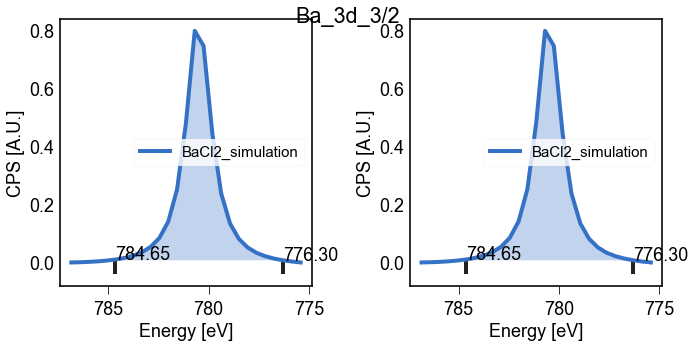

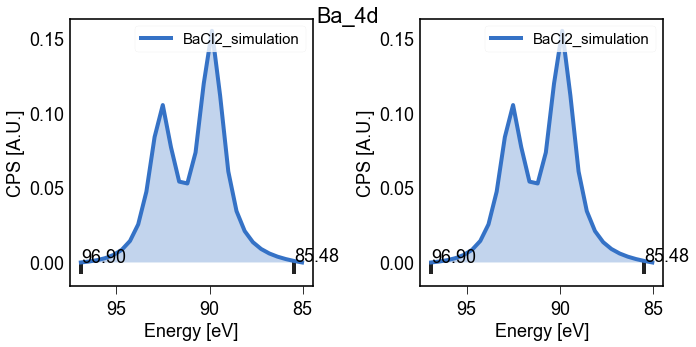

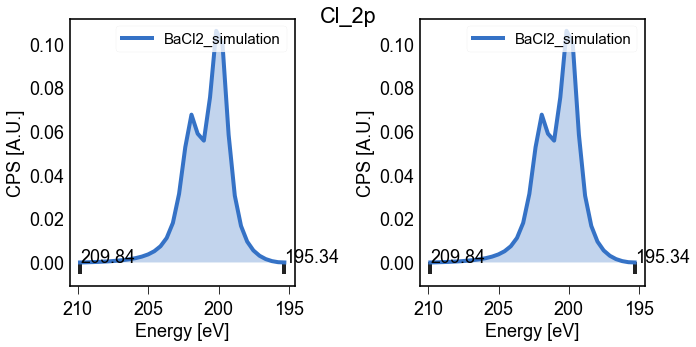

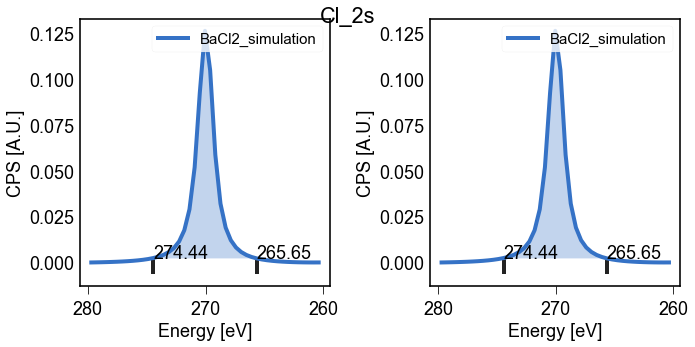

In [943]:
xp = bgsim
nsigma = 6
for r in regs:
#     region = 'Cl_2s'
    Fn = XPFit(xp, r)
    if r == 'Ba_4d':
        fitv = Fn.double_voigt(91)
        edw = fitv.best_values['v1_center'] - nsigma*fitv.best_values['v1_sigma']
        eup = fitv.best_values['v2_center'] + nsigma*fitv.best_values['v2_sigma']
    else:
        fitv = Fn.voigt()
#     Fn.plot(ax=plt.gca())

        edw = fitv.best_values['v1_center'] - nsigma*fitv.best_values['v1_sigma']
        eup = fitv.best_values['v1_center'] + nsigma*fitv.best_values['v1_sigma']

    integrateRegions([xp, xp], r, asf=asf2, eup=eup, edw=edw, )

In [935]:
bgsim.area['Cl_2p'] / (bgsim.area['Ba_3d_5/2'] + bgsim.area['Ba_3d_3/2'])

1.0760026794682946

In [936]:
bgsim.area['Cl_2s'] / (bgsim.area['Ba_3d_5/2'] + bgsim.area['Ba_3d_3/2'])

1.1938204920365558

In [944]:
num = ['Cl_2p', 'Cl_2s', 'Cl_2p']
denom = ['Ba_4d', 'Ba_4d', 'Cl_2s']
make_stoichometry_table([bgsim], num=num, denom=denom)

Experiment	Cl_/Ba_	Cl_/Ba_	Cl_/Cl_	
BaCl2_simulation	1.72 	 1.90 	 0.90 	 


In [945]:
bgsim.area['Ba_4d'] / (bgsim.area['Ba_3d_5/2'] + bgsim.area['Ba_3d_3/2'])

0.6267624648483827

### ASF

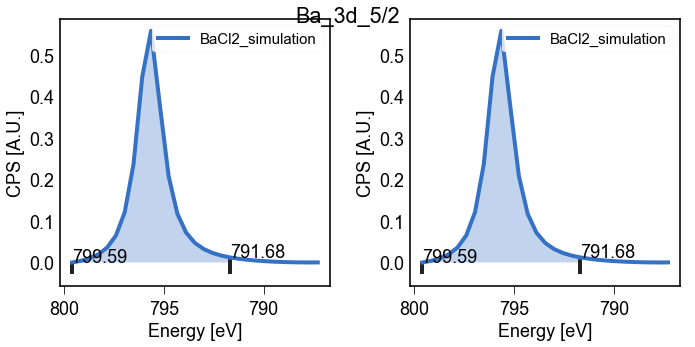

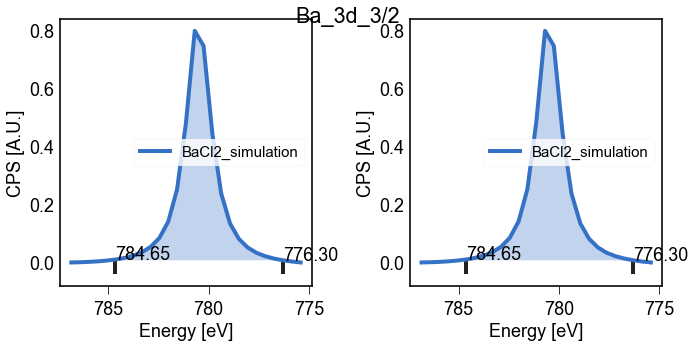

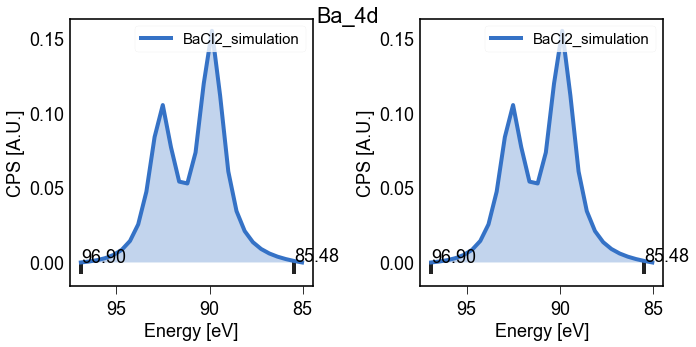

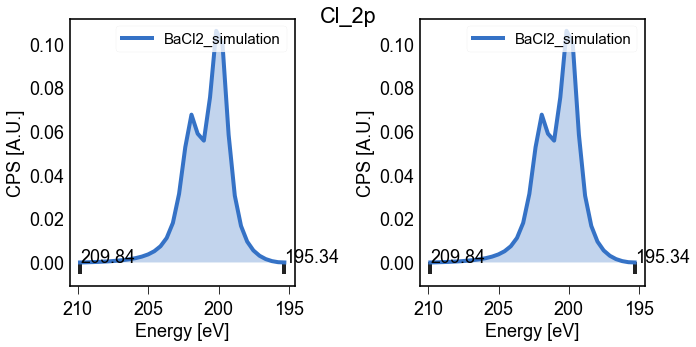

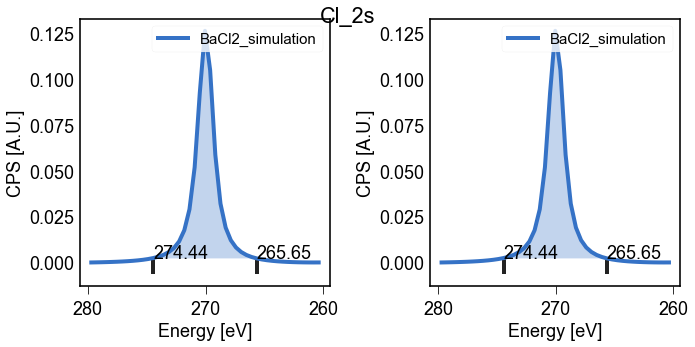

In [946]:
xp = bgsim
nsigma = 6
for r in regs:
#     region = 'Cl_2s'
    Fn = XPFit(xp, r)
    if r == 'Ba_4d':
        fitv = Fn.double_voigt(91)
        edw = fitv.best_values['v1_center'] - nsigma*fitv.best_values['v1_sigma']
        eup = fitv.best_values['v2_center'] + nsigma*fitv.best_values['v2_sigma']
    else:
        fitv = Fn.voigt()
#     Fn.plot(ax=plt.gca())

        edw = fitv.best_values['v1_center'] - nsigma*fitv.best_values['v1_sigma']
        eup = fitv.best_values['v1_center'] + nsigma*fitv.best_values['v1_sigma']

    integrateRegions([xp, xp], r, asf=asf, eup=eup, edw=edw, )

In [939]:
bgsim.area['Cl_2p'] / (bgsim.area['Ba_3d_5/2'] + bgsim.area['Ba_3d_3/2'])

0.7997061419311815

In [940]:
bgsim.area['Cl_2s'] / (bgsim.area['Ba_3d_5/2'] + bgsim.area['Ba_3d_3/2'])

1.5837402184887241

In [947]:
num = ['Cl_2p', 'Cl_2s', 'Cl_2p']
denom = ['Ba_4d', 'Ba_4d', 'Cl_2s']
make_stoichometry_table([bgsim], num=num, denom=denom)

Experiment	Cl_/Ba_	Cl_/Ba_	Cl_/Cl_	
BaCl2_simulation	1.76 	 3.49 	 0.50 	 


In [948]:
bgsim.area['Ba_4d'] / (bgsim.area['Ba_3d_5/2'] + bgsim.area['Ba_3d_3/2'])

0.4539339543860577